<span style="font-family:Times New Roman; font-size:14pt;">
<h2 align="center"><b>Transportation Planning Project - Phase One</b></h2>
</span>

<span style="font-family:Times New Roman; font-size:14pt;  line-height: 0.15;">
<h4 align="center"><b>Hasti Shahhoseini</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 99104016
<h4 align="center"><b>Sadra Daneshvar</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   98104111
<h4 align="center"><b>Reza Nourkhah</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 99103571
</h4>
</span>




<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Problem Overview<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

In response to the pressing operational challenge of managing the escalating demand for bicycle rentals at a prominent center in Seoul, our project aims to leverage a comprehensive dataset as a strategic tool to address this critical issue. The dataset in focus encapsulates the hourly count of bicycle rentals per day, offering valuable insights into the demand dynamics confronting our operational counterpart.

Our approach begins with an in-depth exploration of the dataset, meticulously examining the characteristics, types, and distributions of relevant variables. Subsequent to this exploratory phase, we will implement robust processing and cleansing procedures to prepare the dataset for the development of predictive models. The overarching goal is to extract actionable insights that can inform strategic decision-making and operational planning.

Within our methodological framework, we plan to employ the Autoregressive Integrated Moving Average (ARIMA) statistical model, complemented by two Machine Learning (ML) models. Through a rigorous comparative analysis, we aim to discern the most effective model, which will then be applied to predict bicycle rental demand for the upcoming 7 days. This anticipatory approach not only addresses the immediate challenge of demand forecasting but positions us as strategic partners, offering valuable recommendations for resource allocation and operational enhancement to our collaborating entity.

</span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our Approach<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

To complement our strategic initiative, we present the complete program dedicated to addressing the demand forecasting challenge at the bicycle rental center in Seoul. In alignment with our commitment to transparency and user-friendly comprehension, the code is organized into distinct blocks, each with a designated purpose. Prior to each block, a thorough explanation elucidates the operations conducted within, shedding light on the underlying logic of the code.

The program's structure is meticulously designed to optimize convenience and readability. Furthermore, each line of code is accompanied by comments, serving as a guide to mitigate potential confusion for readers. This comprehensive approach aims to facilitate a seamless understanding of the codebase and its strategic implications. 

Furthermore, our endeavor involves a systematic approach with five key steps to address the challenge at hand. It is important to note that the results of each section will be discussed at the conclusion of that particular phase and will serve as the foundation for subsequent steps in our analytical process.


<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Section One; Analysis of Demand Distribution Patterns<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">


In this section, our primary objective is to conduct an exploratory analysis of the distribution of bicycle rental demand across various temporal dimensions, including different times of the day, seasons of the year, and days of the week. By delving into the patterns and shapes of these distributions, we aim to gain valuable insights into the temporal dynamics of demand, laying the groundwork for informed decision-making and subsequent modeling efforts. The outcomes of this analysis will provide a foundational understanding of the demand landscape, informing our strategic approach in subsequent sections.


<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>3.1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Code Explanation<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

In the following code block, we start by importing the NumPy and Pandas libraries, aliased as np and pd respectively. We read a CSV file named 'SeoulBikeData.csv' into a Pandas DataFrame called 'Data' using the Latin-1 encoding. Next, we convert the 'Date' column in the DataFrame to datetime format using the specified day/month/year format.

To ensure reproducibility, we create a new DataFrame named 'random_data' by randomly sampling all rows from the original 'Data' DataFrame. The random state is set to 42. Subsequently, we reset the index of the DataFrame to the default, dropping the existing index, and update the 'Data' DataFrame with the newly organized 'random_data'. Finally, we display the first 10 rows of the updated 'Data' DataFrame using the head() function. This code appears to be aimed at shuffling and randomizing the rows of the original dataset, possibly for purposes such as training machine learning models or conducting statistical analyses with a randomized sample.

<span>

In [1]:
import numpy as np  # Importing the NumPy library and alias it as np
import pandas as pd  # Importing the Pandas library and alias it as pd

Data = pd.read_csv(r"G:\University\Terme 9\Assignment\TP\Project\Phase 1\SeoulBikeData.csv", encoding='latin-1')
# Reading the CSV file into a Pandas DataFrame called 'Data' using Latin-1 encoding

Data['Date'] = pd.to_datetime(Data['Date'], format="%d/%m/%Y")
# Converting the 'Date' column in the DataFrame to datetime format using the specified format

random_data = Data.sample(n=len(Data), random_state=42)  # Setting random_state for reproducibility
# Creating a new DataFrame called 'random_data' by randomly sampling all rows from the original 'Data' DataFrame, using a fixed random state for reproducibility

Data = random_data.reset_index(drop=True)
# Resetting the index of the DataFrame to default, dropping the existing index, and updating the 'Data' DataFrame with the newly organized 'random_data'

Data.head(10)
# Displaying the first 10 rows of the updated 'Data' DataFrame

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2018-08-10,1728,8,27.2,69,1.8,1999,21.0,0.70,0.0,0.0,Summer,No Holiday,Yes
1,2018-07-20,822,12,32.6,51,2.1,800,21.1,3.21,0.0,0.0,Summer,No Holiday,Yes
2,2018-08-07,658,14,34.0,50,1.2,1744,22.1,1.68,0.0,0.0,Summer,No Holiday,Yes
3,2018-10-16,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
4,2018-04-18,1083,7,6.4,51,1.0,1398,-3.0,0.19,0.0,0.0,Spring,No Holiday,Yes
5,2018-07-29,636,1,28.0,71,0.6,1799,22.2,0.00,0.0,0.0,Summer,No Holiday,Yes
6,2018-08-06,1537,20,31.3,65,2.0,1586,23.9,0.02,0.0,0.0,Summer,No Holiday,Yes
7,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8,2018-08-11,425,7,26.7,67,0.8,2000,20.0,0.13,0.0,0.0,Summer,No Holiday,Yes
9,2018-09-26,594,1,16.6,53,1.7,2000,6.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


<span style="font-family: Times New Roman; font-size: 13pt;">

In this section of the code, we import necessary modules from Matplotlib for creating and styling plots. The `matplotlib.pyplot` module is imported and aliased as `plt`. Additionally, we import the `font_manager` submodule as `fm`, the `ticker` submodule as `ticker`, and the `mplcyberpunk` module for Cyberpunk-style plots.

The plot style is set to "cyberpunk" using `plt.style.use("cyberpunk")`. Subsequently, we specify the path to a downloaded font file named 'lmmono10-regular.otf' and assign it to the variable `font_path`. This font file is then used to create a font manager (`font_manager.FontProperties`) with the specified font, and the resulting font properties are stored in the variable `font_props`. This setup is intended to apply a Cyberpunk aesthetic to the plots, using the specified font for text elements.

<span>

In [2]:
import matplotlib.pyplot as plt  # Importing the pyplot module from Matplotlib and alias it as plt
from matplotlib import font_manager as fm  # Importing the font_manager submodule from Matplotlib and alias it as fm
import matplotlib.ticker as ticker  # Importing the ticker submodule from Matplotlib and alias it as ticker
import mplcyberpunk  # Importing the mplcyberpunk module for Cyberpunk-style plots (Installation is advised)

plt.style.use("cyberpunk")  # Setting the plot style to Cyberpunk

# Setting the font path (change this accordingly)
font_path =  "E:\Desktop\lmmono10-regular.otf"

# Creating a font manager with the specified font
font_props = fm.FontProperties(fname=font_path)

<span style="font-family: Times New Roman; font-size: 13pt;">

In this part of the code, we create a bar plot and a line plot to visualize the distribution of rented bikes across different hours. The `Data` DataFrame is grouped by the 'Hour' column, and the sum of 'Rented Bike Count' for each hour is calculated and stored in the `Data_Hour` series. 

The bar plot is created using `plt.bar()` with a coolwarm color gradient, black edges, and a Cyberpunk-style gradient effect. Additionally, a line plot is generated using `Data_Hour.plot()` with yellow lines, circular markers, and a solid line style. The x-axis and y-axis ticks are customized with specified font properties and fontsize. Labels for the x-axis, y-axis, and title are set with distinctive formatting. Finally, the entire plot is displayed using `plt.show()`. The combination of bar and line plots with the Cyberpunk style and specific fonts creates a visually appealing representation of bike rental distribution over different hours.

<span>

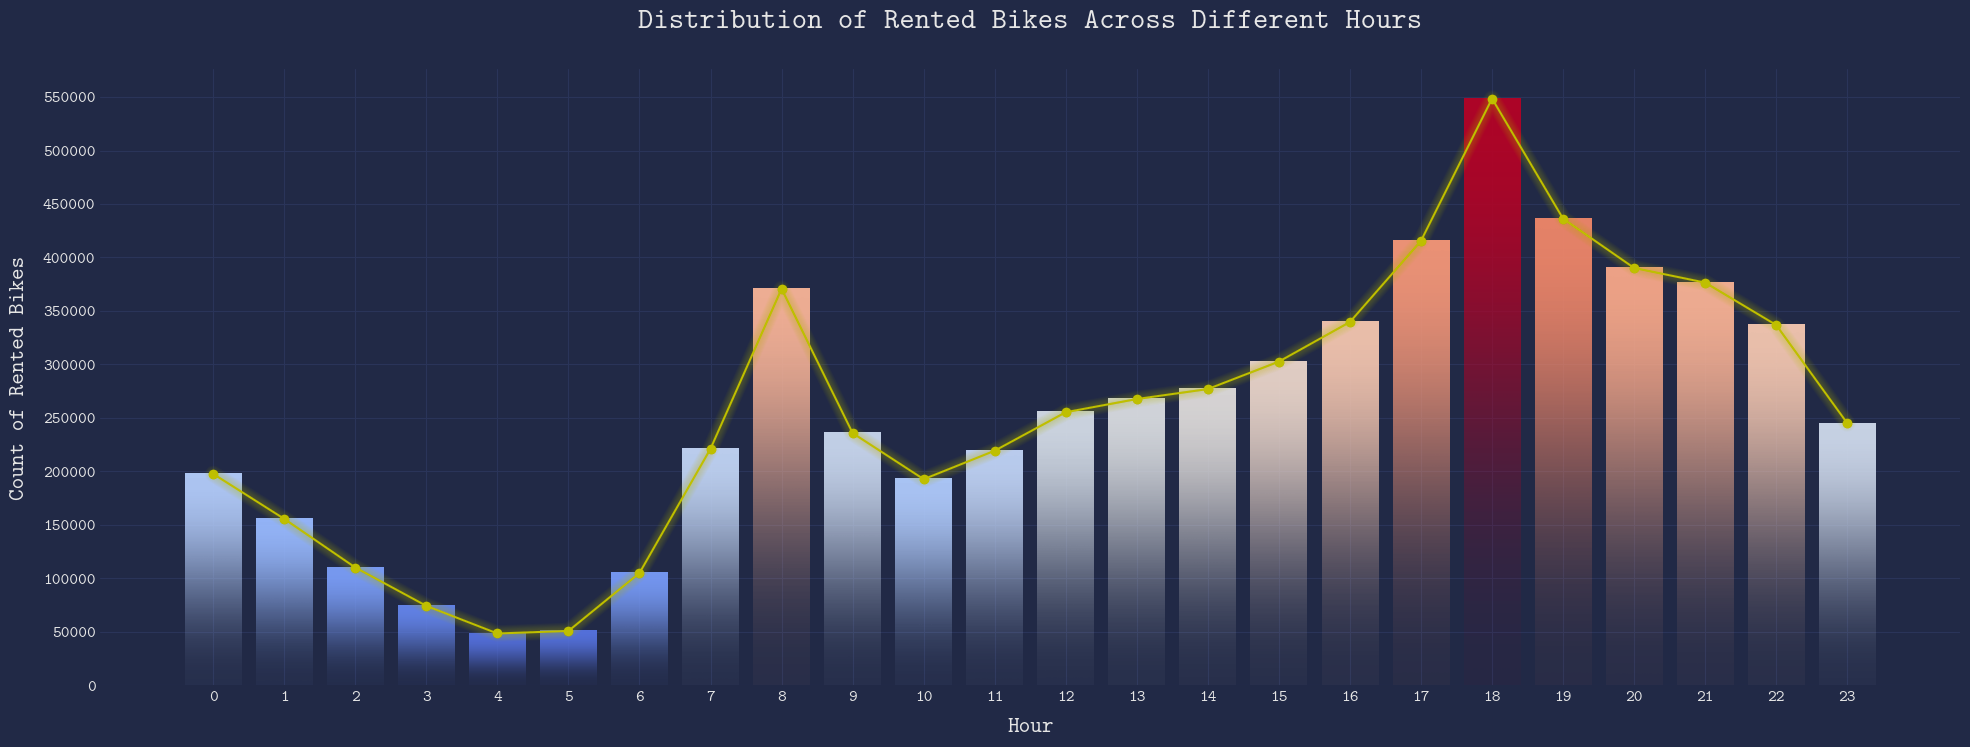

In [3]:
plt.figure(figsize=(24,8))  # Creating a new figure with a specified size of 24x8 inches

Data_Hour = Data.groupby('Hour')['Rented Bike Count'].sum()  # Grouping the 'Data' DataFrame by the 'Hour' column and sum the 'Rented Bike Count'

bars = plt.bar(Data_Hour.index, Data_Hour.values, color=plt.cm.coolwarm(Data_Hour.values / max(Data_Hour.values)), linewidth=1.5)
mplcyberpunk.add_bar_gradient(bars=bars)
# Creating a bar plot using the grouped data, where each bar is colored with a coolwarm gradient based on the normalized values of 'Rented Bike Count'
# Adding a Cyberpunk-style gradient using mplcyberpunk.

Data_Hour.plot(kind='line', color='y', marker='o', linestyle='-')  # Creating a line plot for the 'Data_Hour' series with yellow line color, circular markers, and solid line style
mplcyberpunk.make_lines_glow()  # Adding a glow effect to the lines in the plot for a Cyberpunk aesthetic

plt.xticks(Data_Hour.index, fontproperties=font_props, fontsize=12)  # Setting x-axis ticks using the 'Hour' values with specified font properties and fontsize
plt.yticks(np.arange(0, max(Data_Hour.values)+50000, 50000), fontproperties=font_props, fontsize=12)  # Setting y-axis ticks with a range from 0 to the maximum value of 'Rented Bike Count' with intervals of 50000
plt.xlabel('Hour', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)  # Setting the x-axis label with specified font properties, fontsize, bold weight, and label padding
plt.ylabel('Count of Rented Bikes', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)  # Setting the y-axis label with specified font properties, fontsize, bold weight, and label padding
plt.title('Distribution of Rented Bikes Across Different Hours', fontproperties=font_props, fontsize=21, weight='bold', pad=30)
# Setting the plot title with specified font properties, fontsize, bold weight, and padding

plt.show()  # Displaying the plot

<span style="font-family: Times New Roman; font-size: 13pt;">

Next section of the code generates a bar plot and a line plot to illustrate the distribution of rented bikes across different seasons. The 'Data' DataFrame is grouped by the 'Seasons' column, and the sum of 'Rented Bike Count' for each season is calculated and stored in the `seasonal_data` series. The series is then reindexed to display the seasons in a specific order (Spring, Summer, Autumn, Winter).

The bar plot is created using `plt.bar()` with a coolwarm color gradient, black edges, and a Cyberpunk-style gradient effect. Additionally, a line plot is generated using `seasonal_data.plot()` with yellow lines, circular markers, a solid line style, and an increased linewidth. The x-axis and y-axis ticks are customized, and labels for the x-axis, y-axis, and title are set with distinctive formatting. The y-axis ticks are formatted as full numbers with commas using `ticker.FuncFormatter`. The resulting plot provides a visually appealing representation of bike rental distribution across different seasons, following the Cyberpunk aesthetic established earlier in the code.

<span>

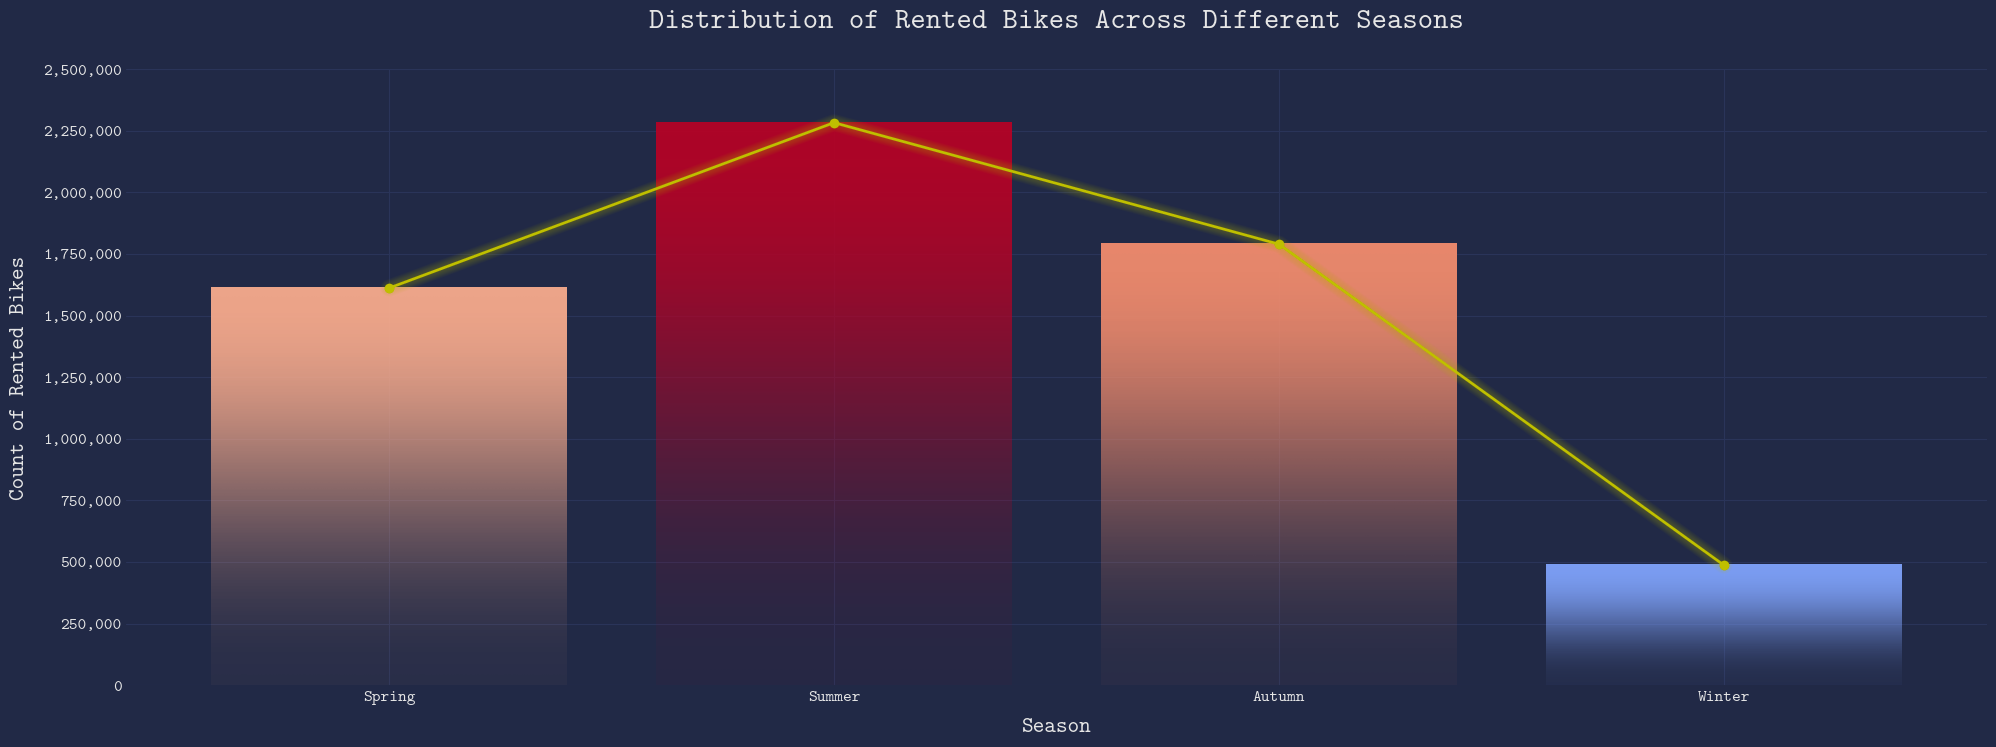

In [4]:
plt.figure(figsize=(24,8))  # Creating a new figure with a specified size of 24x8 inches

seasonal_data = Data.groupby('Seasons')['Rented Bike Count'].sum()  # Grouping the 'Data' DataFrame by the 'Seasons' column and sum the 'Rented Bike Count'
seasonal_data = seasonal_data.reindex(['Spring', 'Summer', 'Autumn', 'Winter'])  # Reindexing the 'seasonal_data' series to have a specific order of seasons

bars = plt.bar(seasonal_data.index, seasonal_data.values, color=plt.cm.coolwarm(seasonal_data.values / max(seasonal_data.values)), linewidth=1.5)
mplcyberpunk.add_bar_gradient(bars=bars)
# Creating a bar plot using the grouped data, where each bar is colored with a coolwarm gradient based on the normalized values of 'Rented Bike Count'.
# Adding a Cyberpunk-style gradient using mplcyberpunk.

seasonal_data.plot(kind='line', color='y', marker='o', linestyle='-', linewidth=2)  # Create a line plot for the 'seasonal_data' series with yellow line color, circular markers, solid line style, and increased linewidth
mplcyberpunk.make_lines_glow()  # Adding a glow effect to the lines in the plot for a Cyberpunk aesthetic

plt.xticks(seasonal_data.index, fontproperties=font_props, fontsize=12)  # Seting x-axis ticks using the 'Seasons' values with specified font properties and fontsize
plt.yticks(np.arange(0, max(seasonal_data.values)+250000, 250000), fontproperties=font_props, fontsize=12)  # Seting y-axis ticks with a range from 0 to the maximum value of 'Rented Bike Count' with intervals of 250,000
plt.xlabel('Season', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)  # Seting the x-axis label with specified font properties, fontsize, bold weight, and label padding
plt.ylabel('Count of Rented Bikes', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)  # Seting the y-axis label with specified font properties, fontsize, bold weight, and label padding
plt.title('Distribution of Rented Bikes Across Different Seasons', fontproperties=font_props, fontsize=21, weight='bold', pad=30)  # Seting the plot title with specified font properties, fontsize, bold weight, and padding

# Using FuncFormatter to format y ticks as full numbers
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
# Formating y-axis ticks as full numbers (adding commas for thousands) using FuncFormatter

plt.show()  # Displaying the plot

<span style="font-family: Times New Roman; font-size: 13pt;">

This section of the code generates a bar plot and a line plot to visualize the distribution of rented bikes across different weekdays. A new DataFrame named 'Data_weekly' is created as a copy of the original 'Data' DataFrame, and a new column 'day_of_week' is added to store the extracted day names from the 'Date' column. The 'Data_weekly' DataFrame is then grouped by the 'day_of_week' column, and the sum of 'Rented Bike Count' for each weekday is calculated and stored in the `daily_data` series.

The bar plot is created using `plt.bar()` with a coolwarm color gradient, black edges, and a Cyberpunk-style gradient effect. Additionally, a line plot is generated using `daily_data.plot()` with yellow lines, circular markers, a solid line style, and an increased linewidth. The x-axis and y-axis ticks are customized, and labels for the x-axis, y-axis, and title are set with distinctive formatting. The y-axis ticks are formatted as full numbers with commas using `ticker.FuncFormatter`. The resulting plot provides a visually appealing representation of bike rental distribution across different weekdays, maintaining the Cyberpunk aesthetic established earlier in the code.

<span>

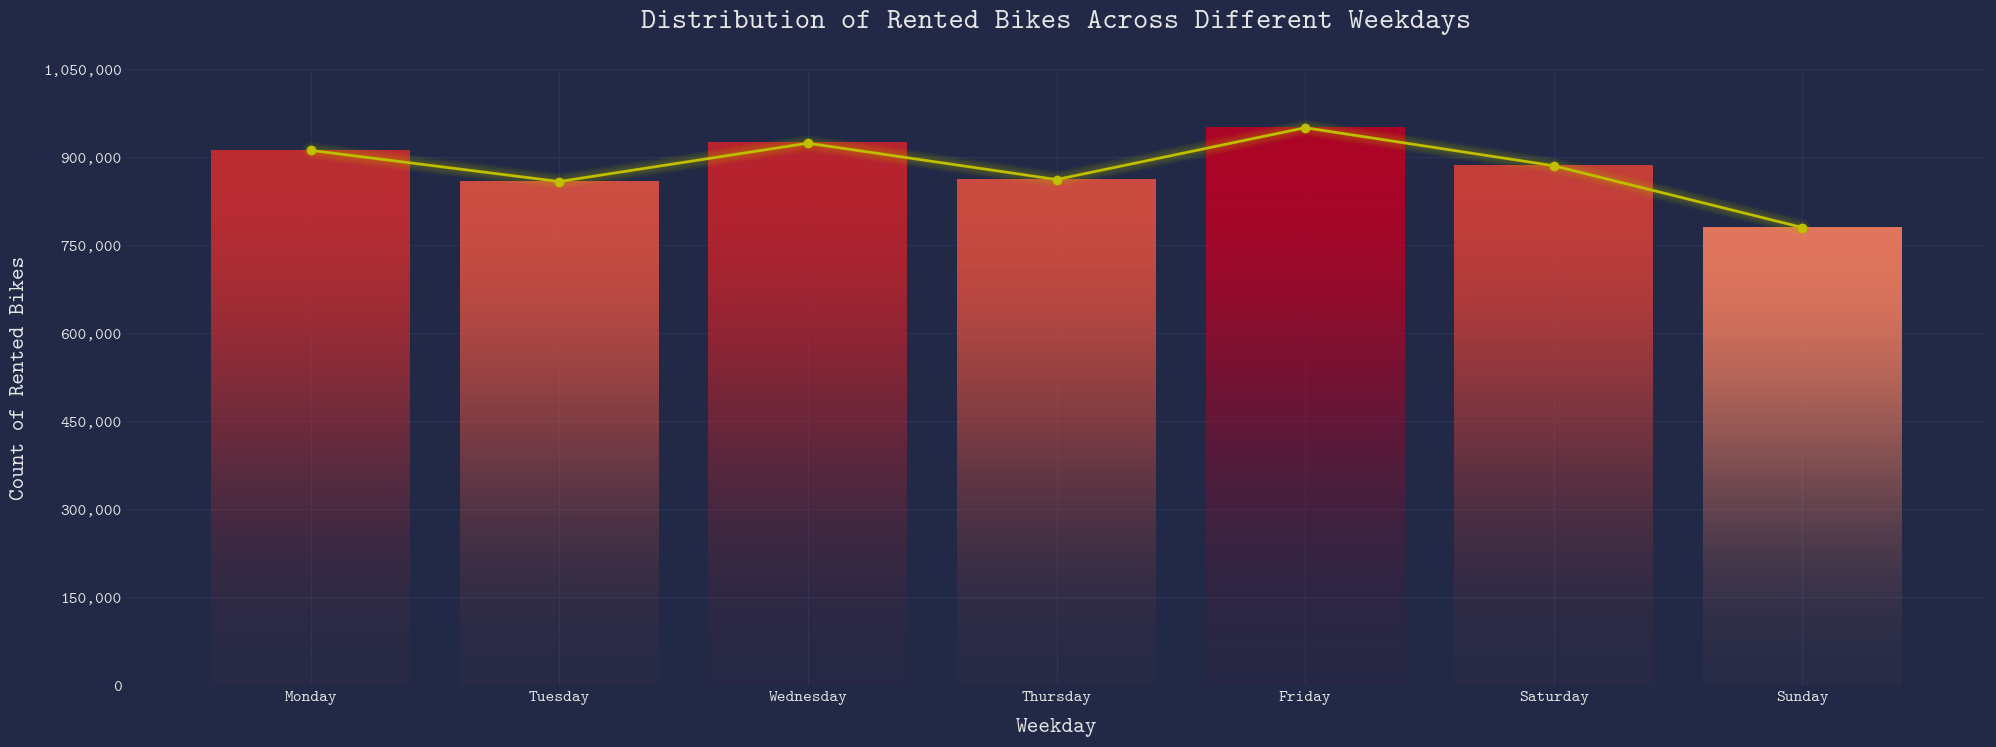

In [5]:
plt.figure(figsize=(24,8))  # Create a new figure with a specified size of 24x8 inches

Data_weekly = Data.copy()  # Create a copy of the 'Data' DataFrame named 'Data_weekly'
Data_weekly['day_of_week'] = Data_weekly['Date'].dt.day_name()  # Extract the day of the week from the 'Date' column and store it in a new column 'day_of_week'
daily_data = Data_weekly.groupby('day_of_week')['Rented Bike Count'].sum()  # Group the 'Data_weekly' DataFrame by the 'day_of_week' column and sum the 'Rented Bike Count'
daily_data = daily_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Reindex the 'daily_data' series to have a specific order of weekdays

bars = plt.bar(daily_data.index, daily_data.values, color=plt.cm.coolwarm(daily_data.values / max(daily_data.values)),  linewidth=1.5)
mplcyberpunk.add_bar_gradient(bars=bars)
# Create a bar plot using the grouped data, where each bar is colored with a coolwarm gradient based on the normalized values of 'Rented Bike Count'.
# Add a Cyberpunk-style gradient using mplcyberpunk.

daily_data.plot(kind='line', color='y', marker='o', linestyle='-', linewidth=2)  # Create a line plot for the 'daily_data' series with yellow line color, circular markers, solid line style, and increased linewidth
mplcyberpunk.make_lines_glow()  # Add a glow effect to the lines in the plot for a Cyberpunk aesthetic

plt.xticks(daily_data.index, fontproperties=font_props, fontsize=12)  # Set x-axis ticks using the 'day_of_week' values with specified font properties and fontsize
plt.yticks(np.arange(0, max(daily_data.values)+150000, 150000), fontproperties=font_props, fontsize=12)  # Set y-axis ticks with a range from 0 to the maximum value of 'Rented Bike Count' with intervals of 150,000
plt.xlabel('Weekday', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)  # Set the x-axis label with specified font properties, fontsize, bold weight, and label padding
plt.ylabel('Count of Rented Bikes', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)  # Set the y-axis label with specified font properties, fontsize, bold weight, and label padding
plt.title('Distribution of Rented Bikes Across Different Weekdays', fontproperties=font_props, fontsize=21, weight='bold', pad=30)
# Set the plot title with specified font properties, fontsize, bold weight, and padding

# Use FuncFormatter to format y ticks as full numbers
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
# Format y-axis ticks as full numbers (adding commas for thousands) using FuncFormatter

plt.show()  # Display the plot

<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>3.2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Results<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

The data illuminates notable trends in bike rentals, emphasizing distinct patterns across hours, seasons, and weekdays. Hourly, there's a clear diurnal rhythm, with a peak at 6 PM, suggesting a preference for evening rides. This trend might align with individuals using bikes for recreational purposes after work hours.

Seasonal variations are pronounced, with summer registering the highest demand, followed by spring, autumn, and winter. This aligns with the expected inclination for outdoor activities during warmer weather. The weekday distribution further underscores preferences, with Fridays standing out as the day with the highest bike rentals, indicating a potential connection with weekend planning or leisure activities.

Understanding these trends can be crucial for adapting services to meet customer preferences. For instance, adjusting bike availability and promotional efforts during peak hours and popular seasons could optimize service utilization. Additionally, recognizing the weekday patterns may inform marketing strategies or pricing models to align with varying demand throughout the week. Exploring these trends in more detail, possibly considering external factors like weather conditions, could provide deeper insights into the dynamics of bike rentals.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>4&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Section Two; Distributions & Holiday Impact Analysis<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">


In this section, our focus is on conducting a thorough investigation into the demand for bicycle rentals, specifically comparing patterns between holidays and non-holidays. The analysis initiates with an exploration of the distribution of all numeric variables within our dataset, providing a holistic view of the data landscape. Subsequently, we construct a boxplot to visually depict the demand variations between holidays and non-holidays. To ascertain the presence of statistically significant differences, we delve into normality testing using the Darling-Anderson test. Depending on the normality status of the data, we employ either the two-sample t-test for normal distributions or the Wallis-Kruskal test for non-normal distributions. Leveraging the SciPy library in Python, this section endeavors to offer a comprehensive understanding of how bicycle rental demand fluctuates in relation to holiday occurrences, contributing crucial insights for strategic decision-making.


<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>4.1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Code Explanation<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

In this segment of the code, a set of subplots is created to visualize the distributions of numeric variables in the 'Data' DataFrame. The script starts by importing the 'norm' function from the 'scipy.stats' module. It then extracts the names of numeric columns from the 'Data' DataFrame.

Subplots are set up with a specific layout, and a color iterator is created from the 'tab20' colormap. The main title for the entire subplot is established. For each numeric column, a histogram is plotted, along with lines representing the mean and median values. Additionally, a normal distribution curve is drawn using the mean and standard deviation. A glow effect is applied to the lines for a Cyberpunk aesthetic. Subplot titles, tick labels, and grid lines are customized.

The resulting plot provides a comprehensive overview of the distributions of numeric variables, including histograms, mean and median lines, and normal distribution curves. This visualization helps in understanding the characteristics of each numeric variable in the dataset. The Cyberpunk style and specific fonts contribute to the overall visual appeal of the plot.

<span>

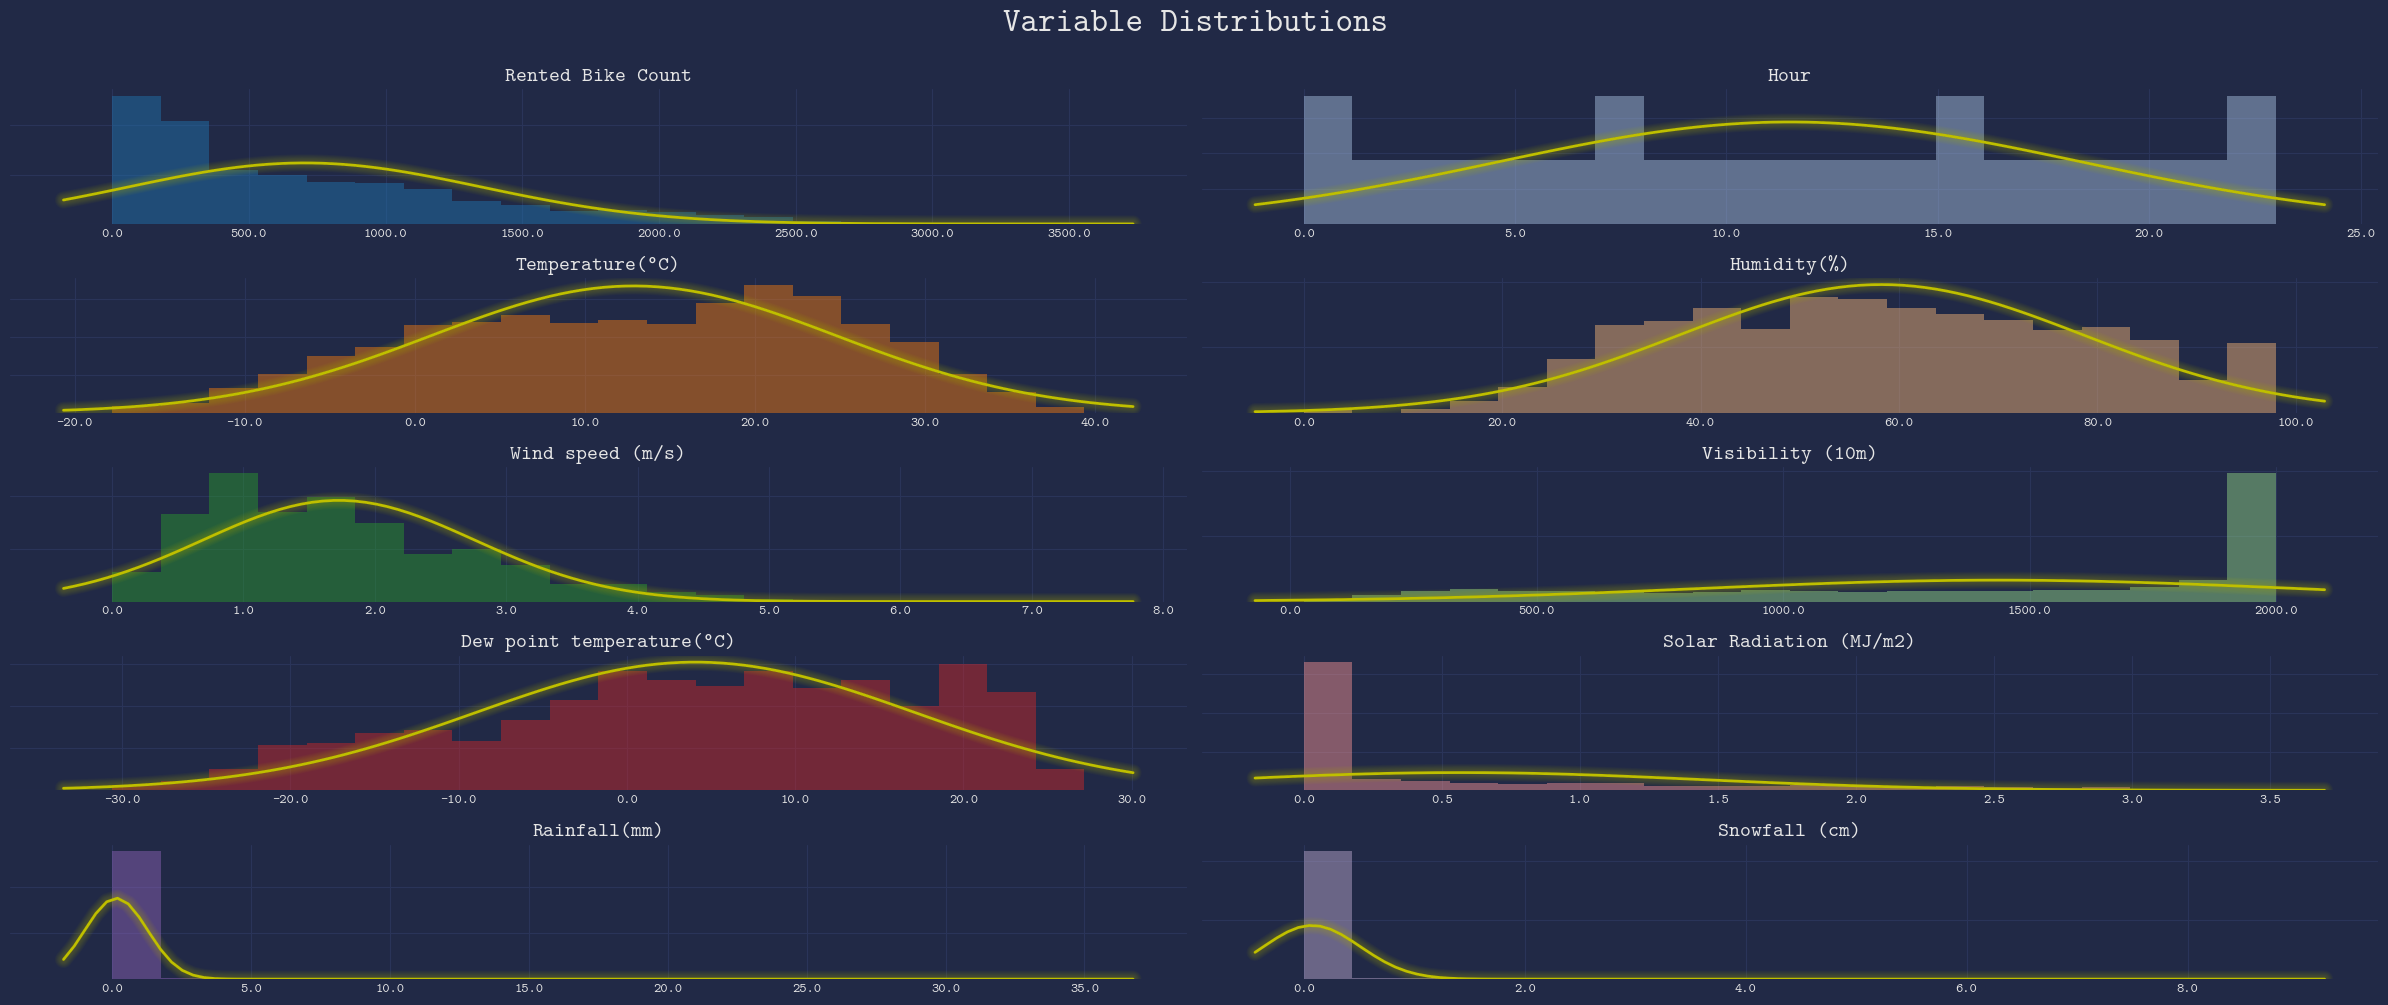

In [6]:
from scipy.stats import norm  # Import the norm function from the scipy.stats module

# Get the list of numeric column names
numeric_columns = Data.select_dtypes(include=['number']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns)//2, ncols=2, figsize=(24, 2 * len(numeric_columns)//2))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get a color iterator from the tab20 colormap
color_iterator = iter(plt.cm.tab20.colors)

# Set a title for the entire subplot
fig.suptitle("Variable Distributions", fontproperties=font_props, fontsize=24, y=1)

# Plot histograms, and normal distribution curve for each numeric column with a different color
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    color = next(color_iterator)
    
    # Plot the histogram
    h = ax.hist(Data[column].dropna(), bins=20, color=color, alpha=0.45, density=True, label='Histogram')
    
    # Calculate mean and median
    mean_val = Data[column].mean()
    median_val = Data[column].median()
    
    # Plot normal distribution curve
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean_val, Data[column].std())
    ax.plot(x, p, 'y', linewidth=2, label='Normal Distribution')  # Plot a yellow line for the normal distribution curve
    mplcyberpunk.make_lines_glow(ax)  # Add a glow effect to the lines in the plot for a Cyberpunk aesthetic
    
    ax.set_title(column, fontproperties=font_props, fontsize=15)  # Set the title for each subplot
    
    # Set tick labels
    x_ticks = ax.get_xticks()[1:-1]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, fontproperties=font_props)  # Set x-axis tick labels with specified font properties
    ax.set_yticklabels("")  # Remove y-axis tick labels
    
    ax.grid(True)  # Display grid lines

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<span style="font-family: Times New Roman; font-size: 13pt;">

In this part of the code, the seaborn library is used to create a box plot that visualizes the distribution of 'Rented Bike Count' during holidays and non-holidays. The box plot is created with the x-axis representing the 'Holiday' variable, the y-axis representing the 'Rented Bike Count', and differentiating hues for holidays and non-holidays using the 'coolwarm' color palette. The legend is turned off to avoid redundancy.

Customizations include setting the title, adjusting tick labels on the x-axis and y-axis, and labeling the y-axis with a specified font, fontsize, and bold weight. The resulting box plot provides an effective visual representation of the distribution of rented bikes during holidays and non-holidays, with the Cyberpunk style and specific fonts contributing to the visual aesthetics.

<span>

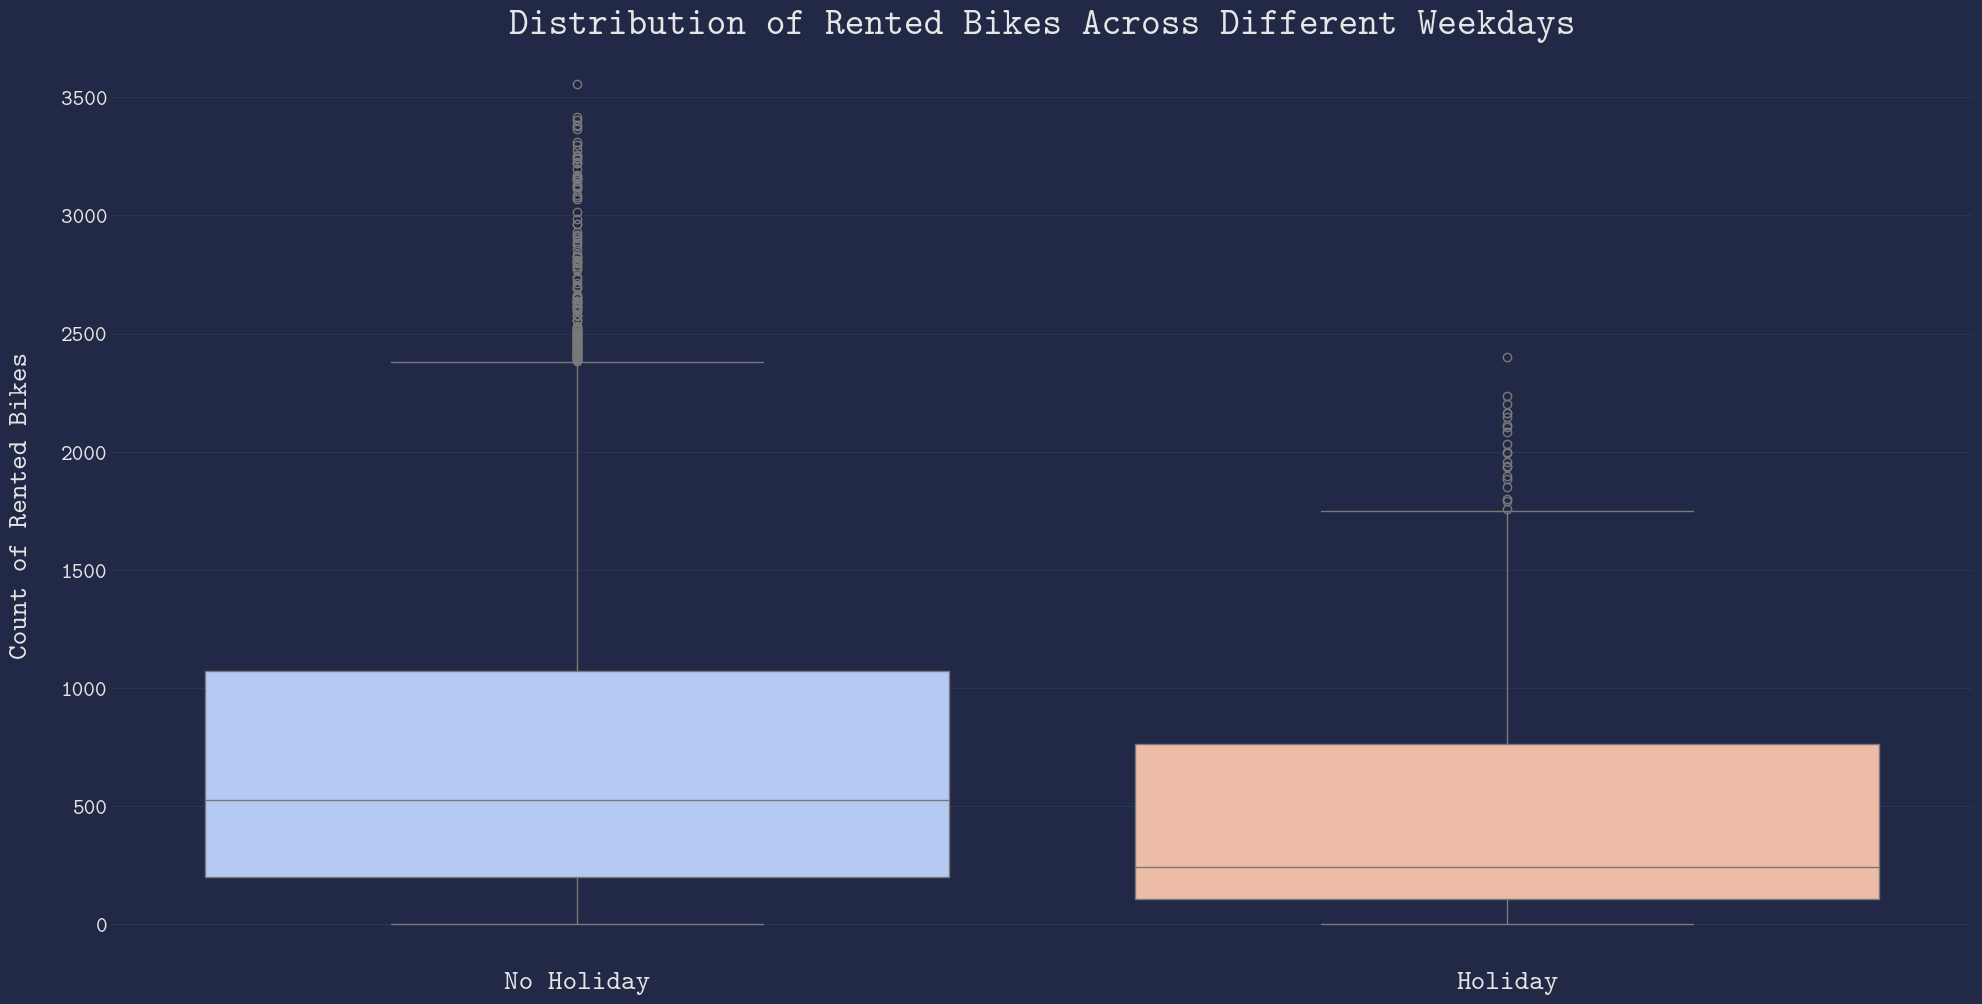

In [7]:
import seaborn as sns  # Import the seaborn library and alias it as sns

plt.figure(figsize=(24, 12))  # Create a new figure with a specified size of 24x12 inches

# Create a box plot using seaborn to visualize the distribution of 'Rented Bike Count' in holidays and non-holidays
sns.boxplot(x='Holiday', y='Rented Bike Count', data=Data, palette='coolwarm', hue='Holiday', legend=False)

plt.title('Box Plot of Rented Bikes in Holidays and No Holidays')  # Set the plot title
plt.xticks(fontproperties=font_props, fontsize=20)  # Set x-axis tick labels with specified font properties and fontsize
plt.yticks(fontproperties=font_props, fontsize=16)  # Set y-axis tick labels with specified font properties and fontsize
plt.xlabel("")  # Set an empty x-axis label
plt.ylabel('Count of Rented Bikes', fontproperties=font_props, fontsize=20, weight='bold', labelpad=20)  # Set the y-axis label with specified font properties, fontsize, bold weight, and label padding
plt.title('Distribution of Rented Bikes Across Different Weekdays', fontproperties=font_props, fontsize=27, weight='bold', pad=0)
# Set the plot title with specified font properties, fontsize, bold weight, and padding

plt.show()  # Display the plot

<span style="font-family: Times New Roman; font-size: 13pt;">

In this section, the Anderson-Darling test is applied to the 'Rented Bike Count' data, separately for both holiday and non-holiday categories. The Anderson-Darling statistic, critical values at different significance levels, and the result of the normality test are printed for each category. The critical values are compared to the Anderson-Darling statistic to determine if the data looks normal at the 5% significance level. If the statistic is less than the critical value at a 5% significance level, it is stated that the data looks normal; otherwise, it is mentioned that the data does not look normal. This statistical analysis helps assess the normality of the distribution of rented bikes in different conditions.

<span>

In [8]:
from scipy.stats import anderson  # Import the Anderson-Darling test from the scipy.stats module

# Perform the Anderson-Darling test for 'Rented Bike Count' in both holiday and non-holiday categories
for holiday in ["No Holiday", "Holiday"]:
    result = anderson(Data.loc[Data['Holiday'] == holiday]["Rented Bike Count"])
    
    print(f"\nAnderson-Darling test for {holiday}:")
    print("Anderson-Darling statistic: {:.4f}".format(result.statistic))
    print("Critical values at different significance levels:")
    
    # Print critical values for different significance levels
    for i in range(len(result.critical_values)):
        print("{:.1f}%: {:.4f}".format(result.significance_level[i], result.critical_values[i]))

    # Compare the Anderson-Darling statistic with critical values
    if result.statistic < result.critical_values[2]:
        print(f"The data of rented bikes in {holiday} looks normal at the 5% significance level.")
    else:
        print(f"The data of rented bikes in {holiday} DOES NOT look normal at the 5% significance level.")


Anderson-Darling test for No Holiday:
Anderson-Darling statistic: 284.1526
Critical values at different significance levels:
15.0%: 0.5760
10.0%: 0.6560
5.0%: 0.7870
2.5%: 0.9180
1.0%: 1.0910
The data of rented bikes in No Holiday DOES NOT look normal at the 5% significance level.

Anderson-Darling test for Holiday:
Anderson-Darling statistic: 35.0434
Critical values at different significance levels:
15.0%: 0.5710
10.0%: 0.6500
5.0%: 0.7800
2.5%: 0.9100
1.0%: 1.0820
The data of rented bikes in Holiday DOES NOT look normal at the 5% significance level.


<span style="font-family: Times New Roman; font-size: 13pt;">

In the previous section, we conducted the Anderson-Darling test to assess the normality of the distribution of rented bikes during both holidays and non-holidays. However, since the data did not meet the assumption of normality, we opted for a non-parametric statistical test to evaluate potential differences among different hours of the day. Specifically, we employed the Kruskal-Wallis test on grouped data, where each group represented the 'Rented Bike Count' during a specific hour. The Kruskal-Wallis test is a non-parametric alternative to the one-way analysis of variance (ANOVA), designed for situations where the assumptions of normality and homogeneity of variances are not met. The obtained Kruskal-Wallis statistic and p-value allowed us to make inferences about the presence of statistically significant differences between the groups, providing a robust approach for our analysis even when normality assumptions were not satisfied.

<span>

In [9]:
from scipy.stats import kruskal  # Import the Kruskal-Wallis test from the scipy.stats module

# Assuming Data_H is your grouped data
hour_groups = [group['Rented Bike Count'].values for _, group in Data.groupby('Hour')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*hour_groups)

# Print the results
print(f'Kruskal-Wallis Statistic: {statistic}')
print(f'P-value: {p_value}')

# Check for statistical significance (using a significance level of 0.05)
if p_value < 0.05:
    print('The differences between groups are statistically significant.')
else:
    print('There is no evidence of statistically significant differences between groups.')

Kruskal-Wallis Statistic: 2369.961256210828
P-value: 0.0
The differences between groups are statistically significant.


<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>4.2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Results<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

The Kruskal-Wallis test statistic of 2369.96 and the associated p-value of 0.0 indicate that there are statistically significant differences in the distribution of rented bikes across different hours of the day. The p-value, being extremely low, suggests strong evidence against the null hypothesis, which assumes that there are no differences between the groups. Therefore, we reject the null hypothesis in favor of the alternative, concluding that there are significant variations in the number of rented bikes at different hours.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Section Three; Variable Selection for Demand Behavior Analysis<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

In this section, our focus is on employing correlation analysis, manifested through a correlation matrix, and the Lasso algorithm to discern the variables that most effectively determine the behavior of bicycle rental demand. By leveraging these analytical tools, we aim to identify and prioritize the key factors influencing demand dynamics. This strategic variable selection process will enhance our understanding of the critical determinants driving demand patterns, facilitating the subsequent development of precise and impactful predictive models.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>5.1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Code Explanation<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

In this section of the code, we preprocess the 'Functioning_Data' DataFrame for further analysis. First, we filter the DataFrame to include only rows where 'Functioning Day' is 'Yes'. Next, dummy variables are created for categorical columns ('Seasons', 'day of week', 'Hour') using one-hot encoding, and the first category is dropped to prevent multicollinearity. The resulting dummy variables are then concatenated with the original DataFrame. Finally, unnecessary columns ('index', 'Hour', 'Date', 'Seasons', 'day_of_week') are dropped, and the categorical values in the 'Holiday' column are replaced with numerical equivalents (0 for 'No Holiday', 1 for 'Holiday'). This preprocessing step prepares the data for subsequent analysis, such as regression modeling or other statistical techniques.

<span>

In [10]:
Functioning_Data = Data.loc[Data['Functioning Day'] == 'Yes'].reset_index().drop("Functioning Day", axis=1)
# Filter the 'Data' DataFrame to include only rows where 'Functioning Day' is 'Yes', reset the index, and drop the 'Functioning Day' column

# Generate dummy variables for the 'Seasons' column, dropping the first category to avoid multicollinearity, and convert to integers
dummy_season = pd.get_dummies(Functioning_Data['Seasons'], drop_first=True).astype(int)


# Extract the day of the week from the 'Date' column, generate dummy variables, dropping the first day to avoid multicollinearity, and convert to integers
Functioning_Data['day_of_week'] = Functioning_Data['Date'].dt.day_name()
dummy_weekday = pd.get_dummies(Functioning_Data['day_of_week'], drop_first=True).astype(int)

# Generate dummy variables for the 'Hour' column, dropping the first hour to avoid multicollinearity, and convert to integers
dummy_hour = pd.get_dummies(Functioning_Data['Hour'], drop_first=True).astype(int)

# Concatenate the dummy variables with the 'Functioning_Data' DataFrame
Functioning_Data = pd.concat([Functioning_Data, dummy_hour, dummy_weekday, dummy_season], axis=1)
# Drop unnecessary columns from the concatenated DataFrame
Functioning_Data = Functioning_Data.drop(["index", "Hour", "Date", "Seasons", "day_of_week"], axis=1)

# Replace categorical 'Holiday' values with numerical values (0 for 'No Holiday', 1 for 'Holiday')
Functioning_Data['Holiday'] = Functioning_Data['Holiday'].replace({'No Holiday': 0, 'Holiday': 1})

<span style="font-family: Times New Roman; font-size: 13pt;">

In the next code block, a correlation matrix is calculated for the preprocessed 'Functioning_Data' DataFrame. Subsequently, a heatmap is created using the seaborn library to visualize the correlation coefficients between different variables. The heatmap includes annotations displaying the correlation values with two decimal places. The color map 'coolwarm' is utilized to represent positive and negative correlations, with cooler colors indicating negative correlations and warmer colors indicating positive correlations. The resulting heatmap provides a clear and concise overview of the relationships between variables, aiding in identifying potential patterns and dependencies within the dataset. The plot is customized with specific font properties, font sizes, and a bold title for enhanced visual clarity.

<span>

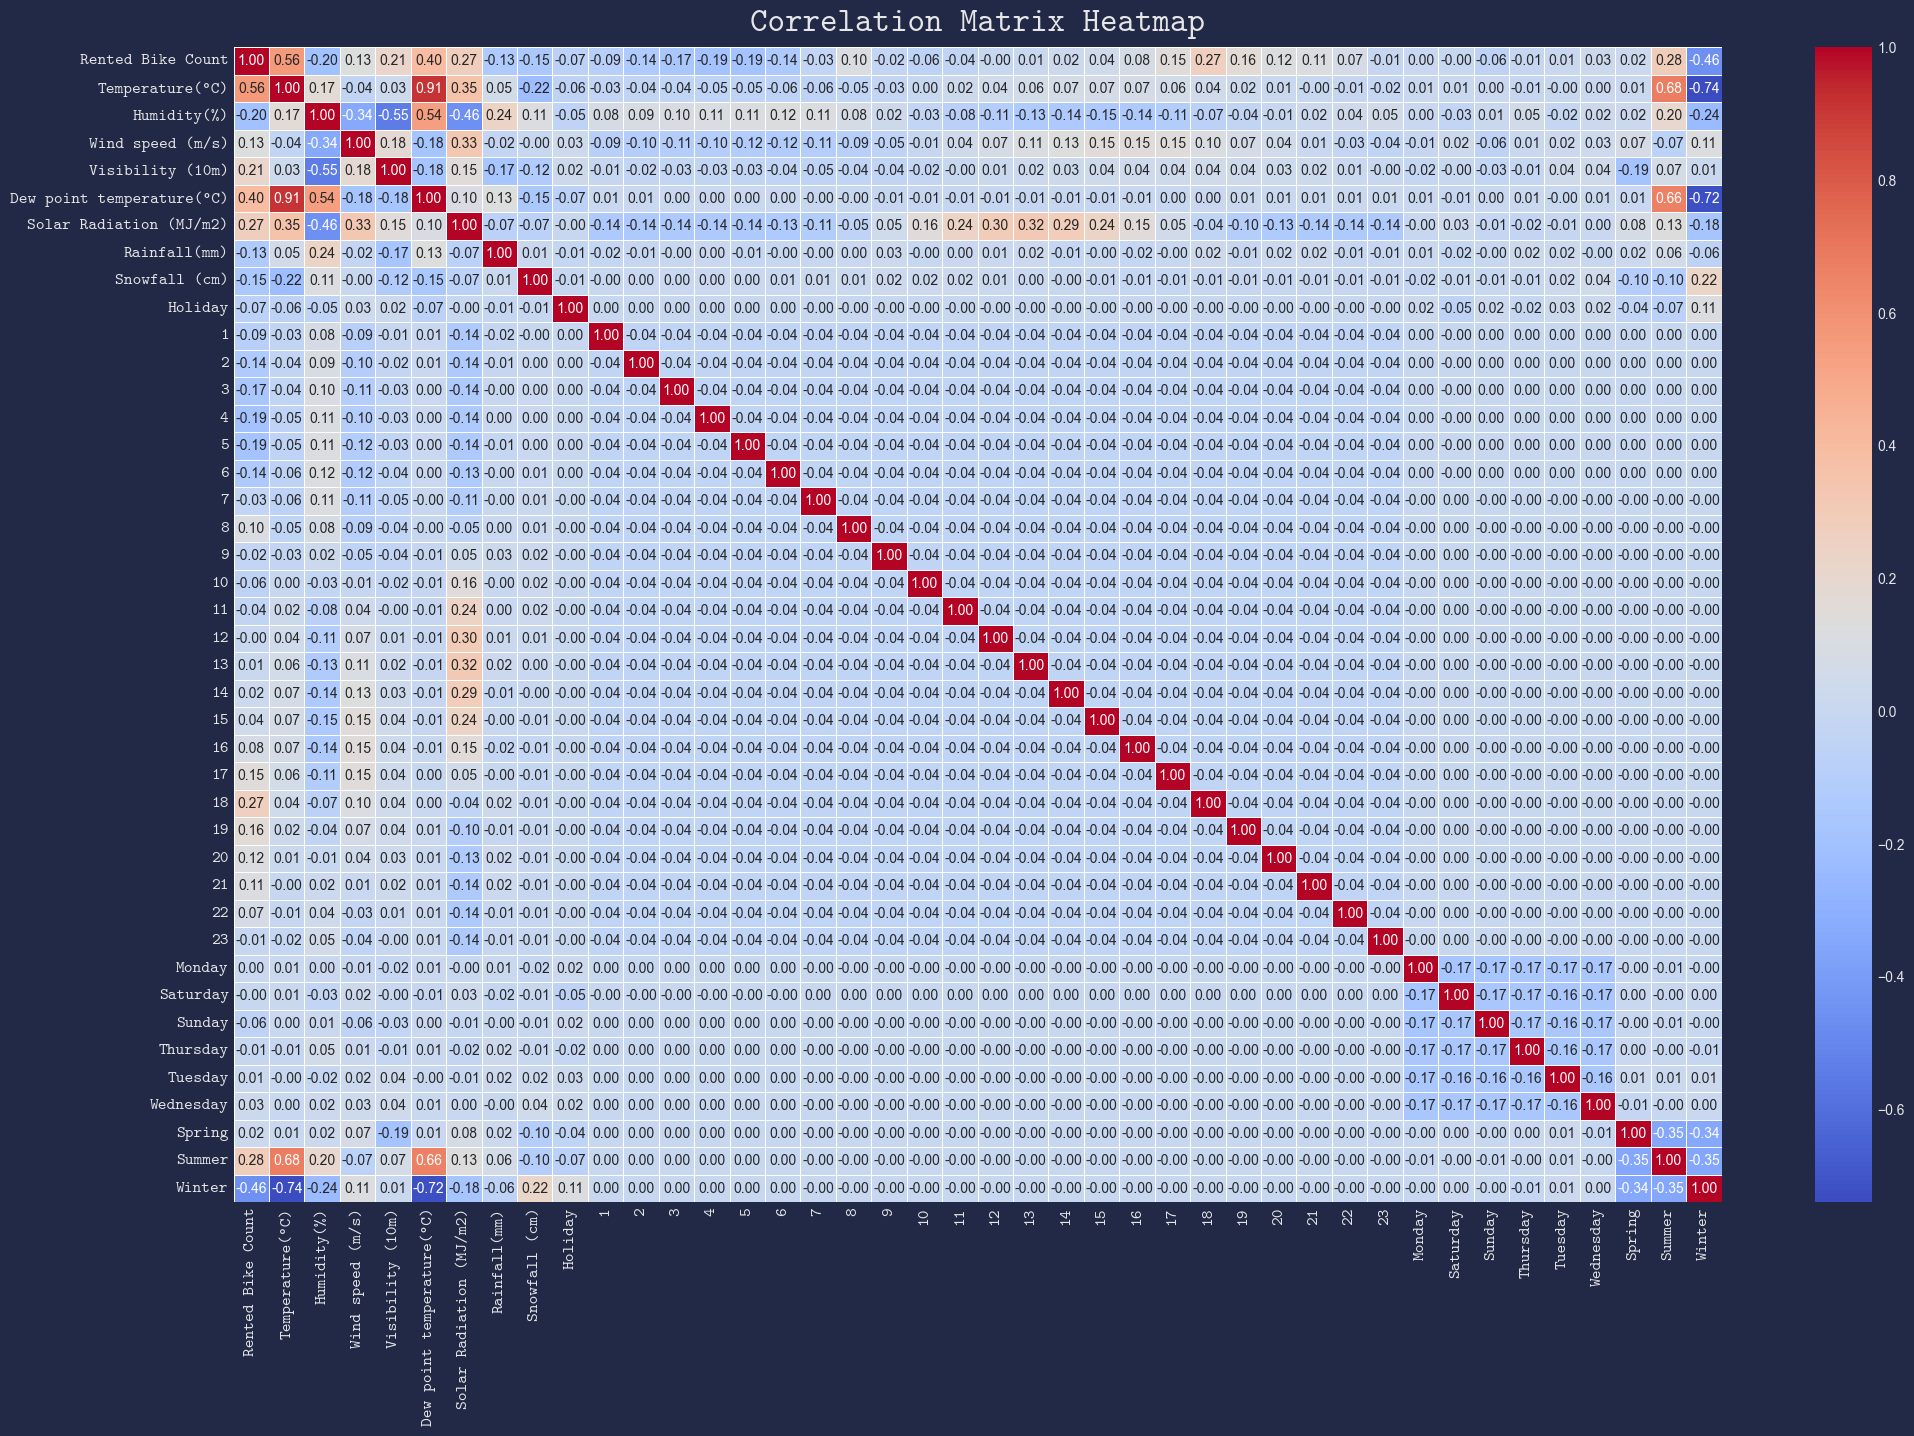

In [11]:
correlation_matrix = Functioning_Data.corr()
# Compute the correlation matrix for the 'Functioning_Data' DataFrame

# Plot a heatmap with annotations, formatting values with two decimal places, using the 'coolwarm' color map, and specifying linewidths
plt.figure(figsize=(24, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

plt.title('Correlation Matrix Heatmap')  # Set the plot title

plt.xticks(fontproperties=font_props, fontsize=12)  # Set x-axis tick labels with specified font properties and fontsize
plt.yticks(fontproperties=font_props, fontsize=12)  # Set y-axis tick labels with specified font properties and fontsize
plt.title('Correlation Matrix Heatmap', fontproperties=font_props, fontsize=24, weight='bold', pad=12)
# Set the plot title with specified font properties, fontsize, bold weight, and padding

plt.show()  # Display the heatmap

<span style="font-family: Times New Roman; font-size: 13pt;">

In our analysis, the primary objective is to assess collinearity within the dataset, disregarding the specific correlation of each independent variable with the dependent variable, namely, the Rented Bike Count. Subsequent to this examination, we intend to evaluate the impact of these variables on the target variable through Lasso analysis in the forthcoming code blocks.

A notable observation in the correlation matrix is the substantial correlation between the variables Temperature (°C) and Dew point temperature (°C). Given the conceptual interpretability of the Temperature (°C) variable, and as a supplementary step following Lasso analysis, we prioritize it due to its higher correlation with the dependent variable compared to Dew point temperature (°C). Consequently, we retain Temperature (°C) while excluding the latter variable from our considerations. This strategic decision is informed by a preference for variables with stronger conceptual clarity and, concurrently, higher correlation with the target variable, reinforcing the efficacy of our subsequent analytical approaches.

<span>


<span style="font-family: Times New Roman; font-size: 13pt;">

Now, in the following code, based on the above inference, a new DataFrame named 'Lasso_Data' is created by dropping the column 'Dew point temperature(°C)' from the 'Functioning_Data' DataFrame. The column names in the resulting 'Lasso_Data' DataFrame are then converted to strings using the `astype` method. This process is done in preparation for Lasso regression analysis.

<span>


In [12]:
Lasso_Data = Functioning_Data.drop(["Dew point temperature(°C)"], axis=1)
# Remove the column 'Dew point temperature(°C)' from the 'Functioning_Data' DataFrame and create a new DataFrame 'Lasso_Data'

Lasso_Data.columns = Lasso_Data.columns.astype(str)
# Convert all column names in the 'Lasso_Data' DataFrame to strings

<span style="font-family: Times New Roman; font-size: 13pt;">

In this code block, a Lasso regression model is trained using a pipeline that includes feature scaling and Lasso regression. The features are standardized using the StandardScaler, and the data is split into training and testing sets. A GridSearchCV is performed to find the optimal value for the Lasso regularization parameter (alpha) through cross-validation. The results of the grid search are stored in a DataFrame, and the index corresponding to the maximum mean test score is identified as the optimal alpha value. This process is crucial for fine-tuning the hyperparameters of the Lasso regression model and improving its predictive performance.

<span>

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV  # Import necessary modules for model training and evaluation
from sklearn.linear_model import Lasso  # Import the Lasso regression model
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler for feature scaling
from sklearn.pipeline import Pipeline  # Import the Pipeline for creating a modeling pipeline

# Extract the feature columns from the 'Lasso_Data' DataFrame by excluding the target variable 'Rented Bike Count'
features = Lasso_Data.drop("Rented Bike Count", axis=1)

# Standardize the features using StandardScaler to have zero mean and unit variance
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Split the standardized features and target variable into training and testing sets using a specified test size and random state
X_train, X_test, y_train, y_test = train_test_split(features_standardized, Lasso_Data["Rented Bike Count"], test_size=0.3, random_state=42)

# Create a pipeline with Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features using StandardScaler
    ('model', Lasso())  # Use Lasso regression as the modeling algorithm
])

# Specify a range of alpha values for Lasso regression in the parameter grid
param_grid = {'model__alpha': np.arange(0.01, 1, 0.005)}

# Perform grid search with 5-fold cross-validation, using negative mean squared error as the scoring metric
search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Train the model on the training data to find the best hyperparameter (alpha) using grid search
search.fit(X_train, y_train)

# Store the results of the grid search in a DataFrame
results = pd.DataFrame(search.cv_results_)

# Identify the index corresponding to the maximum mean test score in the grid search results DataFrame
max_score_index = results['mean_test_score'].idxmax()

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV] END ..................................model__alpha=0.01; total time=   0.0s
[CV] END ..................................model__alpha=0.01; total time=   0.0s
[CV] END ..................................model__alpha=0.01; total time=   0.0s
[CV] END ..................................model__alpha=0.01; total time=   0.0s
[CV] END ..................................model__alpha=0.01; total time=   0.0s
[CV] END .................................model__alpha=0.015; total time=   0.0s
[CV] END .................................model__alpha=0.015; total time=   0.0s
[CV] END .................................model__alpha=0.015; total time=   0.0s
[CV] END .................................model__alpha=0.015; total time=   0.0s
[CV] END .................................model__alpha=0.015; total time=   0.0s
[CV] END ..................model__alpha=0.019999999999999997; total time=   0.0s
[CV] END ..................model__alpha=0.0199

<span style="font-family: Times New Roman; font-size: 13pt;">

Now, in the following block, the mean cross-validated score for each alpha value in the Lasso regression grid search is visualized using a line plot. Additionally, a gradient glow is added to enhance the visual appeal of the plot. The point corresponding to the best alpha is highlighted with a red dot, and an annotation provides information about the best alpha and its associated mean cross-validated score. The x-axis represents different alpha values (regularization strength), and the y-axis represents the mean cross-validated score. The plot provides insights into the impact of varying alpha values on the model's performance and helps in selecting the optimal regularization parameter for the Lasso regression model.

<span>

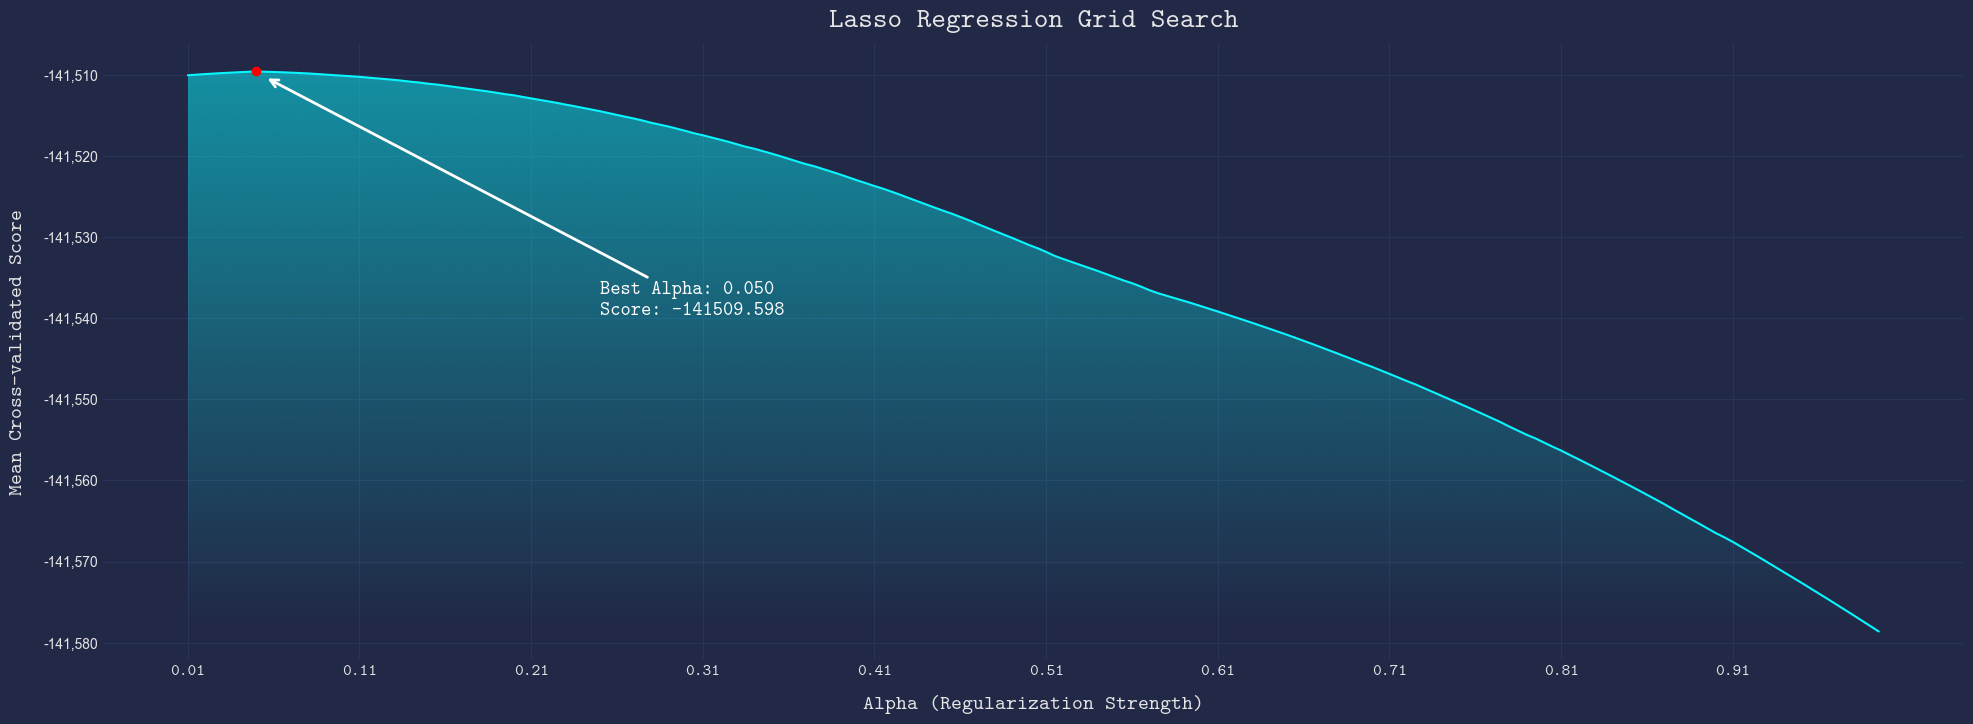

In [14]:
# Plot the mean cross-validated score for each alpha
plt.figure(figsize=(24, 8))

# Plot the mean cross-validated score using a line plot
plt.plot(results['param_model__alpha'], results['mean_test_score'], label='Mean Cross-validated Score')

# Add a gradient glow to the plot
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5)

# Mark the point corresponding to the best alpha with a red dot
plt.scatter(results.loc[max_score_index, 'param_model__alpha'], results.loc[max_score_index, 'mean_test_score'], color='red', zorder=5)

# Annotate the best alpha and its corresponding score
plt.annotate(f"Best Alpha: {results.loc[max_score_index, 'param_model__alpha']:.3f}\nScore: {results.loc[max_score_index, 'mean_test_score']:.3f}",
             xy=(results.loc[max_score_index, 'param_model__alpha']+0.005, results.loc[max_score_index, 'mean_test_score']-0.7),
             xytext=(results.loc[max_score_index, 'param_model__alpha'] + 0.2, results.loc[max_score_index, 'mean_test_score'] - 30),
             arrowprops=dict(color='white', arrowstyle='->', linewidth=2),
             fontsize=14, fontweight='bold', fontproperties=font_props, color='white')

# Set labels and title
plt.xlabel('Alpha (Regularization Strength)', fontproperties=font_props, fontsize=15, labelpad = 12)
plt.ylabel('Mean Cross-validated Score', fontproperties=font_props, fontsize=15, labelpad = 12)
plt.title('Lasso Regression Grid Search', fontproperties=font_props, fontsize=20, weight='bold', pad=12)

# Set x-axis ticks with specified font properties and fontsize
plt.xticks(np.arange(0.01, 1, 0.1), fontproperties=font_props, fontsize=12)

# Format y-axis ticks as full numbers
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))

# Show the plot
plt.show()


<span style="font-family: Times New Roman; font-size: 13pt;">

In this part of the code, the best alpha value obtained from the grid search is extracted. A Lasso regression model is then trained on the entire training set using the optimal alpha. The features with non-zero coefficients (selected features) and features with zero coefficients are identified based on the Lasso model's coefficients. The selected features provide insights into the variables that contribute significantly to predicting the target variable ('Rented Bike Count'), while features with zero coefficients have been effectively excluded by the Lasso regularization. This information is valuable for feature selection and model interpretability. The selected and excluded features are printed for further analysis and interpretation.

<span>

In [15]:
# Retrieve the optimal alpha value from the grid search results
best_alpha = search.best_params_['model__alpha']

# Fit a Lasso regression model using the best alpha on the entire training set
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Identify the features with non-zero coefficients in the trained Lasso model
selected_features = features.columns[lasso_best.coef_ != 0]

# Identify the features with zero coefficients in the trained Lasso model
zero_coefficient_features = features.columns[lasso_best.coef_ == 0]

# Print the selected features and features with zero coefficients
print("Selected Features:", selected_features)
print("\n")
print("Features with Zero Coefficients:", zero_coefficient_features)

Selected Features: Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Spring', 'Summer', 'Winter'],
      dtype='object')


Features with Zero Coefficients: Index([], dtype='object')


<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>5.2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Results<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

As seen above, the Lasso regression analysis demonstrates that all variables are significant, suggesting each feature contributes uniquely to predicting the Rented Bike Count. This implies a diverse dataset where no variables are redundant. The regularization effect of Lasso may not have favored sparsity, or the dataset inherently requires all variables for effective predictions. Further examination of coefficient magnitudes and other model metrics would provide a more comprehensive understanding of the predictive dynamics.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>6&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Section Four; Demand Prediction Modeling and Performance Evaluation<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

In this section, our focus is on employing both statistical methods and machine learning techniques to predict the target variable – bicycle rental demand. Leveraging the ARIMA model, linear regression, and Random Forest model, we aim to provide a comprehensive forecast. The variables obtained through correlation and Lasso analysis are utilized in the Regression model, while for the Random Forest algorithm, all features are considered.

To evaluate model performance, the Adjusted R^2 index and mean square error (MSE) serve as key metrics. Moreover, we employ methods to prevent overfitting, ensuring the models generalize effectively. This section seeks to deliver insightful analyses of demand prediction models and their respective performance indicators, contributing to the refinement of our forecasting strategy.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>6.1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Code Explanation<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

At the beginning of this process, we are creating the 'Demand' DataFrame specifically tailored for time-series analysis using ARIMA because this model predicts values based on a time series. In the context of time-series forecasting, having a datetime index is crucial as it allows for a chronological order of observations. 

The 'Datetime' column is formed by combining the 'Date' and 'Hour' columns, and the resulting DataFrame is sorted based on this 'Datetime' column. Subsequently, the 'Datetime' column is set as the index, aligning with the requirement for time-series analysis. The original 'Date' and 'Hour' columns are dropped from the 'Demand' DataFrame, streamlining it for the application of ARIMA, which leverages historical data patterns to make predictions about future values in the time series.

<span>

In [16]:
# Create a new DataFrame 'Demand' by selecting the 'Date', 'Hour', and 'Rented Bike Count' columns from the original DataFrame 'Data'
Demand = Data[['Date', 'Hour', 'Rented Bike Count']].reset_index(drop=True)

# Convert the 'Date' column to datetime format if it is not already in that format
Demand['Date'] = pd.to_datetime(Demand['Date'])

# Create a new 'Datetime' column by adding the 'Hour' column as a timedelta to the 'Date' column
Demand['Datetime'] = Demand['Date'] + pd.to_timedelta(Demand['Hour'], unit='h')

# Sort the 'Demand' DataFrame based on the 'Datetime' column to ensure chronological order
Demand.sort_values(by='Datetime', inplace=True)

# Set the 'Datetime' column as the index of the 'Demand' DataFrame
Demand.set_index('Datetime', inplace=True)

# Drop the original 'Date' and 'Hour' columns from the 'Demand' DataFrame
Demand.drop(['Date', 'Hour'], axis=1, inplace=True)

<span style="font-family: Times New Roman; font-size: 13pt;">

In this section of the code, the 'auto_arima' function from the 'pmdarima' library is utilized to automatically fit an ARIMA model to the 'Demand' time series data. The function performs a stepwise search to determine the optimal values for the hyperparameters (p, d, q) based on the Akaike Information Criterion (AIC) and minimizes the ADF (Augmented Dickey-Fuller) test statistic for differencing. The 'trace' parameter is set to True, enabling the display of detailed information about the model fitting process. The resulting ARIMA model is stored in the 'arima_model' variable. Finally, the summary of the fitted ARIMA model is printed, providing insights into the chosen hyperparameters and key statistics of the model. This step is essential for understanding the characteristics and performance of the ARIMA model on the given time series data.

<span>

In [17]:
import pmdarima as pm  # Import the pmdarima library for ARIMA modeling

# Fit an ARIMA model to the 'Demand' time series using the auto_arima function from pmdarima
arima_model = pm.auto_arima(Demand, start_p=1, start_q=1,
                             test='adf',       # use adftest to find optimal 'd'
                             max_p=5, max_q=5,  # maximum p and q
                             m=1,               # frequency of series
                             d=None,            # let the model determine 'd'
                             seasonal=False,    # No Seasonality
                             start_P=0, 
                             D=0, 
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)


# Display a summary of the ARIMA model, including the chosen hyperparameters and model statistics
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=122935.367, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145082.955, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=123604.878, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=135785.198, Time=1.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=122930.469, Time=0.88 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=123054.706, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=122915.381, Time=2.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=122922.214, Time=0.45 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=122906.838, Time=3.93 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=122907.861, Time=0.38 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=8.13 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=122234.682, Time=7.88 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=122645.274, Time=6.36 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=122217.639, Time=11.08 sec
 ARIMA(5,0,

<span style="font-family: Times New Roman; font-size: 13pt;">

In the following section of the code, the time series data is split into training and testing sets, with 90% used for training. In choosing 90% of the data for training, we aim to leverage ARIMA's dependence on historical observations. ARIMA's accuracy relies on patterns within the previous data it encounters, and having a larger training dataset with a smaller batch for testing ensures a well-trained model. The scores obtained from this approach are expected to be higher as the model is exposed to a more extensive set of historical observations. This practice is distinct from machine learning algorithms where predictions are based on features, and the generalization to new data is assessed differently. In the context of time series forecasting with ARIMA, a larger training dataset is beneficial for capturing and learning from past patterns, contributing to improved predictive performance on subsequent time steps.


Then the frequency of the date index is explicitly set to hourly. The stationarity of the training data is checked and addressed through differencing until stationarity is achieved, as determined by the Augmented Dickey-Fuller (ADF) test. The optimal hyperparameters obtained earlier are used to define the order of the ARIMA model. The ARIMA model is fitted to the training data, and predictions are made for the test data period. The R-squared and Mean Squared Error (MSE) are then calculated to evaluate the performance of the ARIMA model on the test data. These metrics provide insights into the accuracy and goodness of fit of the ARIMA model in predicting the demand for rented bikes.

Notably, the R-squared adjusted metric, commonly used in traditional regression models, is not applicable in the context of ARIMA, as it measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Since ARIMA does not involve traditional independent features, the concept of R-squared adjusted is not applicable to assess the model's fit in this context.

<span>

In [18]:
import statsmodels.api as sm  # Import the statsmodels library for time series analysis
from statsmodels.tsa.arima_model import ARIMA  # Import the ARIMA model from statsmodels
from sklearn.metrics import r2_score, mean_squared_error  # Import metrics for model evaluation

split_point = int(len(Demand) * 0.9)  # Set the split point for training and testing data
train_data = Demand[:split_point]  # Extract training data
test_data = Demand[split_point:]  # Extract testing data

# Set the frequency of the date index to hourly ('H')
freq = 'H'
train_data = train_data.asfreq(freq)  # Explicitly set the frequency of the training data index to hourly

# Check and address stationarity
is_stationary = False
while not is_stationary:
    # Differencing (adjust the 'd' parameter as needed)
    train_data_diff = train_data.diff().dropna()  # Difference the training data
    
    # Check stationarity using ADF test
    adf_test = sm.tsa.adfuller(train_data_diff, autolag='AIC')  # Perform ADF test
    is_stationary = adf_test[1] < 0.05  # Check p-value for stationarity

# Use the optimal hyperparameters found in the previous code block as the order
order = (4, 0, 4)  # Set the order for the ARIMA model

# Fit ARIMA model
model = sm.tsa.ARIMA(train_data, order=order)  # Create ARIMA model
arima_results = model.fit()  # Fit the ARIMA model to the training data

# Generate predictions for the test data period
predictions = arima_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Calculate R-squared
r2_arima = r2_score(test_data, predictions)
print(f'R-squared: {r2_arima}')

# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse_arima}')

C:\Users\SMT\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SMT\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\SMT\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


R-squared: 0.013683078083779998
Mean Squared Error (MSE): 237469.6419206912


<span style="font-family: Times New Roman; font-size: 13pt;">

Following the Lasso regression, where all variables were identified as significant, and the ARIMA statistical model, the subsequent steps involve the integration of machine learning models. Scikit-learn is employed for this purpose, and the target variable 'y' is assigned the values from the 'Rented Bike Count' column. Utilizing the features identified by Lasso, stored in 'lasso_selected_features,' the feature matrix 'X' is constructed. Importantly, it is noteworthy that, given the significance of all variables according to Lasso, the training and test datasets for Linear Regression and Random Forest models are identical, encompassing all variables. The data is then divided into training and testing sets using the 'train_test_split' function, with 70% allocated for training and 30% for testing. The introduction of a random seed ensures reproducibility, laying the groundwork for the subsequent training and evaluation of machine learning models.

<span>

In [19]:
from sklearn.linear_model import LinearRegression  # Import the LinearRegression model from scikit-learn
from sklearn.ensemble import RandomForestRegressor  # Import the RandomForestRegressor model from scikit-learn

y = Lasso_Data['Rented Bike Count']  # Assign the 'Rented Bike Count' column to the target variable 'y'

lasso_selected_features = list(selected_features)  # Store the selected features identified by Lasso in a list

X = Lasso_Data[lasso_selected_features]  # Create the feature matrix 'X' using the selected features

# Use the train_test_split function to split the data into training and testing sets with a 70-30 ratio, and set a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<span style="font-family: Times New Roman; font-size: 13pt;">

This code block trains a Linear Regression model using the training set (`X_train`, `y_train`) and then evaluates its performance on the test set (`X_test`). The model's predictions (`y_pred`) are used to calculate R-squared, Adjusted R-squared, and Mean Squared Error (MSE). R-squared measures the proportion of the variance in the target variable explained by the model. Adjusted R-squared considers the number of features and adjusts R-squared accordingly, providing a more reliable measure in the context of multiple features. MSE represents the average squared difference between predicted and actual values, reflecting the model's accuracy. The results are printed to assess the Linear Regression model's fit and predictive performance on the test data.

<span>

In [20]:
regression_model = LinearRegression()  # Create a Linear Regression model
regression_model.fit(X_train, y_train)  # Train the model on the training data

y_pred = regression_model.predict(X_test)  # Generate predictions using the trained model on the test data

r_squared_re = r2_score(y_test, y_pred)  # Calculate R-squared

n = len(y_test)  # Number of observations in the test set
p = X_test.shape[1]  # Number of features
adjusted_r_squared_re = 1 - (1 - r_squared_re) * (n - 1) / (n - p - 1)  # Calculate Adjusted R-squared

mse_re = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error (MSE)

print(f'R-squared: {r_squared_re:.4f}')  # Display R-squared
print(f'Adjusted R-squared: {adjusted_r_squared_re:.4f}')  # Display Adjusted R-squared
print(f'Mean Squared Error (MSE): {mse_re:.4f}')  # Display Mean Squared Error (MSE)


R-squared: 0.6616
Adjusted R-squared: 0.6561
Mean Squared Error (MSE): 135384.0312


<span style="font-family: Times New Roman; font-size: 13pt;">

Within this code block, akin to our approach with Lasso regression, we conduct a grid search to optimize the hyperparameters for a Random Forest model. The parameter grid is defined to explore various combinations of the number of estimators ('n_estimators') and the maximum depth of the trees ('max_depth'). Subsequently, a Random Forest Regressor is instantiated with a fixed random state to ensure reproducibility.

The application of GridSearchCV facilitates an exhaustive search for the best hyperparameters, utilizing negative mean squared error as the evaluation metric and employing 5-fold cross-validation. The outcome, inclusive of the identified optimal hyperparameters, is stored in the `grid_search` variable. This systematic exploration helps pinpoint the configuration that minimizes mean squared error on the training data, enhancing the Random Forest model's predictive accuracy.

Importantly, this grid search serves as a preventive measure against overfitting by fine-tuning the model's hyperparameters. By leveraging cross-validation, we ensure that the model's performance is evaluated across different subsets of the training data, leading to a more robust and generalizable model. This meticulous parameter tuning process is instrumental in achieving an optimal balance between model complexity and performance on unseen data.

<span>

In [21]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [25, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Instantiate a Random Forest Regressor model with a fixed random state for reproducibility
rf_model = RandomForestRegressor(random_state=42)  

# Use GridSearchCV to search for the best hyperparameters based on negative mean squared error, with 5-fold cross-validation and verbosity level 2
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)  # Fit the model on the training data

# Retrieve the best hyperparameters found by the grid search
best_params = grid_search.best_params_  

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.2s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.1s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.3s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.2s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.0s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  22.4s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.4s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.7s
[CV] END max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  39.5s
[CV] END max_depth=25, min_sam

<span style="font-family: Times New Roman; font-size: 13pt;">

Finally, this section of the code creates a Random Forest model using the best hyperparameters obtained from the previous grid search. The model is trained on the training set (`X_train`, `y_train`), and predictions are made on the test set (`X_test`). The R-squared, Adjusted R-squared, and Mean Squared Error (MSE) are calculated to assess the performance of the Random Forest model on the test data. The results are printed for evaluation.

<span>

In [22]:
# Create a Random Forest model using the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)  # Train the model on the training data using the best hyperparameters

# Generate predictions using the trained Random Forest model on the test data
y_pred_rf = best_rf_model.predict(X_test)  

# Calculate R-squared for the Random Forest model
r_squared_rf = r2_score(y_test, y_pred_rf)  

n_rf = len(y_test)  # Number of observations in the test set
p_rf = X_test.shape[1]  # Number of features
adjusted_r_squared_rf = 1 - (1 - r_squared_rf) * (n_rf - 1) / (n_rf - p_rf - 1)  # Calculate Adjusted R-squared for the Random Forest model

# Calculate Mean Squared Error (MSE) for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)  

print(f'R-squared (Random Forest): {r_squared_rf:.4f}')  # Display R-squared for the Random Forest model
print(f'Adjusted R-squared (Random Forest): {adjusted_r_squared_rf:.4f}')  # Display Adjusted R-squared for the Random Forest model
print(f'Mean Squared Error (Random Forest): {mse_rf:.4f}')  # Display Mean Squared Error (MSE) for the Random Forest model


R-squared (Random Forest): 0.8908
Adjusted R-squared (Random Forest): 0.8890
Mean Squared Error (Random Forest): 43692.3980


<span style="font-family: Times New Roman; font-size: 13pt;">

To wrap thing up, in the following code section, a dictionary `metrics_data` is created to store performance metrics (MSE, R-squared, and Adjusted R-squared) for each model (ARIMA, Linear Regression, Random Forest). This data is then converted into a DataFrame (`metrics_df`) and transposed for better visualization. The best model for each metric is identified based on the minimum MSE, maximum R-squared, and maximum Adjusted R-squared. The results are printed to highlight the best-performing models in terms of different evaluation metrics.

<span>

In [23]:
# Define a dictionary with performance metrics for each model
metrics_data = {
    'ARIMA': {'MSE': f'{mse_arima:.2f}', 'R-squared': f'{r2_arima:.3%}', 'Adjusted R-squared': '-'},
    'Linear Regression': {'MSE': f'{mse_re:.2f}', 'R-squared': f'{r_squared_re:.3%}', 'Adjusted R-squared': f'{adjusted_r_squared_re:.3%}'},
    'Random Forest': {'MSE': f'{mse_rf:.2f}', 'R-squared': f'{r_squared_rf:.3%}', 'Adjusted R-squared': f'{adjusted_r_squared_rf:.3%}'}
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Transpose the DataFrame
metrics_df = metrics_df.transpose()
print(metrics_df)
print("\n")

# Find the best model names based on each metric
best_model_mse = metrics_df['MSE'].astype(float).idxmin()
best_model_r_squared = metrics_df['R-squared'].str.rstrip('%').astype(float).idxmax()
best_model_adjusted_r_squared = metrics_df['Adjusted R-squared'].replace('-', float('nan')).str.rstrip('%').astype(float).idxmax()

# Print the best model names for each metric
print(f'Best Model (MSE): {best_model_mse}')
print(f'Best Model (R-squared): {best_model_r_squared}')
print(f'Best Model (Adjusted R-squared): {best_model_adjusted_r_squared}')


                         MSE R-squared Adjusted R-squared
ARIMA              237469.64    1.368%                  -
Linear Regression  135384.03   66.155%            65.613%
Random Forest       43692.40   89.077%            88.902%


Best Model (MSE): Random Forest
Best Model (R-squared): Random Forest
Best Model (Adjusted R-squared): Random Forest


<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>6.2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Results<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

In this section, our approach to prevent overfitting encompassed a multifaceted strategy, leveraging various methods tailored to the characteristics of our predictive models. Cross-validation played a pivotal role, with 5-fold cross-validation employed during the grid search for both the Lasso regression and Random Forest models. This practice ensured a robust evaluation of model performance across diverse subsets of the training data, enhancing generalization to unseen datasets.

Hyperparameter tuning, a crucial aspect of preventing overfitting, was diligently executed through grid searches. In the Lasso regression, this involved optimizing the regularization strength, while for the Random Forest model, the grid search explored combinations of the number of estimators and maximum tree depth. These refined hyperparameters not only improved model accuracy on the training set but also ensured a balanced model capable of making accurate predictions on new data.

Feature selection, implemented through Lasso regression, further contributed to the prevention of overfitting by narrowing down the relevant variables. The selected features were then employed in both the Linear Regression and Random Forest models, enhancing model interpretability and reducing the risk of overfitting to noise in the data.

Lastly, the adoption of an ensemble method, specifically the Random Forest model, served as a robust mechanism against overfitting. The ensemble nature of Random Forest, aggregating predictions from multiple decision trees, mitigates the risk of individual trees overfitting the training data. This approach ensures a more generalized and accurate prediction on unseen datasets, thereby preventing overfitting.

Considering the performance of each model, the ARIMA model yielded suboptimal results with a higher Mean Squared Error (MSE) and a low R-squared, potentially due to its linear nature struggling to capture the complexities inherent in time series data. In contrast, the Linear Regression model demonstrated improved predictive performance, attributed to its ability to model linear relationships between selected features and the target variable. The integration of Lasso regression and grid search likely played a role in achieving a balanced model.

The Random Forest model emerged as the most accurate, displaying the lowest MSE and the highest R-squared. Its ensemble learning approach, synergized with cross-validation, hyperparameter tuning, and feature selection, collectively fortified the model against overfitting, resulting in a robust and accurate predictive framework. In summary, our comprehensive approach, incorporating cross-validation, hyperparameter tuning, feature selection, and ensemble learning, ensured the prevention of overfitting and facilitated the development of models capable of making accurate predictions on unseen data.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>7&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Section Five; Future Demand Forecasting<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

In this final section, we utilize the developed predictive models to project bicycle rental demand. Initially, our forecasting approach was confined to relying on the ARIMA model due to the absence of feature data for the next seven days. Despite the demonstrated superiority of our machine learning models, particularly Linear Regression and Random Forest, compared to the ARIMA model, this practical constraint led us to leverage the ARIMA model's reliance on time series data alone. However, with the recent acquisition of feature data, a significant shift has occurred in our forecasting strategy. We can now harness the full potential of our machine learning models, allowing for a more robust and reliable prediction. This transition marks a pivotal moment in our forecasting methodology, as we move beyond the exclusive use of the ARIMA model and embrace the enriched insights provided by incorporating additional features into our predictions.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>7.1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Code Explanation<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

In this section of the code, we begin by reading the feature data from a CSV file named 'PredictionData.csv,' which is located at the specified path. The data is loaded into a Pandas DataFrame called 'Prediction_Data_Raw' using the Latin-1 encoding. Following this, we process the 'Date' column within the DataFrame by converting it to datetime format with the specified date format ("%d/%m/%Y"). This step is crucial for proper handling of date-related information. The resulting DataFrame, 'Prediction_Data_Raw,' is then ready for utilization in subsequent analysis or predictions.

<span>

In [24]:
Prediction_Data_Raw = pd.read_csv(r"G:\University\Terme 9\Assignment\TP\Project\Phase 1\PredictionData.csv", encoding='latin-1')
# Reading the CSV file located at the specified path into a Pandas DataFrame called 'Data' using Latin-1 encoding

Prediction_Data_Raw['Date'] = pd.to_datetime(Prediction_Data_Raw['Date'], format="%d/%m/%Y")
# Converting the 'Date' column in the DataFrame to datetime format using the specified format

Prediction_Data_Raw.head(5)
# Displaying the first 10 rows of the updated 'Data' DataFrame

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2018-12-01,0,-4.3,55,1.6,1247,-12.7,0.0,0.0,0.0,Winter,Holiday,Yes
1,2018-12-01,1,-4.8,57,1.2,1219,-12.7,0.0,0.0,0.0,Winter,Holiday,Yes
2,2018-12-01,2,-5.5,56,1.4,1285,-12.9,0.0,0.0,0.0,Winter,Holiday,Yes
3,2018-12-01,3,-5.6,50,1.0,1367,-13.0,0.0,0.0,0.0,Winter,Holiday,Yes
4,2018-12-01,4,-5.9,51,1.1,1260,-12.2,0.0,0.0,0.0,Winter,Holiday,Yes


<span style="font-family: Times New Roman; font-size: 13pt;">

In the following code block, we preprocess the 'Prediction_Data_Raw' DataFrame to prepare it for demand prediction. First, we filter the data to include only rows where 'Functioning Day' is 'Yes,' resetting the index and dropping the 'Functioning Day' column. Next, we create dummy variables for the 'Seasons' column, where each season is represented by a binary indicator (0 or 1) to avoid multicollinearity.

Additionally, we extract the day of the week from the 'Date' column, generate dummy variables for weekdays (excluding the first day to prevent multicollinearity), and convert them to integers. Similarly, dummy variables are created for the 'Hour' column, dropping the first hour to avoid multicollinearity.

The resulting dummy variables are concatenated with the 'Prediction_Data' DataFrame, and unnecessary columns, including 'Hour,' 'Date,' 'Seasons,' and 'day_of_week,' are dropped. Categorical values in the 'Holiday' column are replaced with numerical values (0 for 'No Holiday' and 1 for 'Holiday'). Finally, the column 'Dew point temperature(°C)' is removed due to the previous correlation analysis, and all column names are converted to strings for compatibility. The processed DataFrame 'Prediction_Data' is now ready for use in demand prediction.

<span>

In [25]:
Prediction_Data = Prediction_Data_Raw.loc[Prediction_Data_Raw['Functioning Day'] == 'Yes'].reset_index().drop("Functioning Day", axis=1)
# Filter the 'Prediction_Data' DataFrame to include only rows where 'Functioning Day' is 'Yes', reset the index, and drop the 'Functioning Day' column

# Create dummy variables for 'Seasons'
# Create a dictionary to store binary indicators for each season
dummy_season_pred_dict = {
    "Spring": [0] * len(Prediction_Data_Raw['Seasons']),
    "Summer": [0] * len(Prediction_Data_Raw['Seasons']),
    "Winter": [0] * len(Prediction_Data_Raw['Seasons'])
}

# Iterate through the 'Seasons' column to update the dummy variables
for i, season in enumerate(Prediction_Data_Raw['Seasons']):
    if season in dummy_season_pred_dict:
        dummy_season_pred_dict[season][i] = 1

# Convert the dummy variable dictionary to a DataFrame
dummy_season_pred = pd.DataFrame(dummy_season_pred_dict)

# Extract the day of the week from the 'Date' column, generate dummy variables, dropping the first day to avoid multicollinearity, and convert to integers
Prediction_Data['day_of_week'] = Prediction_Data['Date'].dt.day_name()
dummy_weekday_pred = pd.get_dummies(Prediction_Data['day_of_week'], drop_first=True).astype(int)

# Generate dummy variables for the 'Hour' column, dropping the first hour to avoid multicollinearity, and convert to integers
dummy_hour_pred = pd.get_dummies(Prediction_Data['Hour'], drop_first=True).astype(int)

# Concatenate the dummy variables with the 'Functioning_Data' DataFrame
Prediction_Data = pd.concat([Prediction_Data, dummy_hour_pred, dummy_weekday_pred, dummy_season_pred], axis=1)
# Drop unnecessary columns from the concatenated DataFrame
Prediction_Data = Prediction_Data.drop(["index", "Hour", "Date", "Seasons", "day_of_week"], axis=1)

# Replace categorical 'Holiday' values with numerical values (0 for 'No Holiday', 1 for 'Holiday')
Prediction_Data['Holiday'] = Prediction_Data['Holiday'].replace({'No Holiday': 0, 'Holiday': 1})

Prediction_Data = Prediction_Data.drop(["Dew point temperature(°C)"], axis=1)
# Remove the column 'Dew point temperature(°C)' from the 'Prediction_Data' DataFrame

Prediction_Data.columns = Prediction_Data.columns.astype(str)
# Convert all column names in the 'Prediction_Data' DataFrame to strings

<span style="font-family: Times New Roman; font-size: 13pt;">

In this Python code segment, the focus is on forecasting using three distinct models: ARIMA, Random Forest, and Linear Regression. The primary aim is to predict the upcoming days' bike rental counts. 

To begin with, the ARIMA model is employed for predictions. Leveraging the pre-trained ARIMA model stored in the `arima_results` object, the code generates predictions for a specified number of days (`days_to_predict`). The results are structured in a DataFrame named `predictions_arima`.

Moving on, both Random Forest and Linear Regression models contribute to the forecasting task. The Random Forest model (`best_rf_model`) and the Linear Regression model (`regression_model`) are applied to forecast bike rental counts for the specified future days. The predicted values from these models are organized into DataFrames named `predictions_rf` and `predictions_re`, respectively.

To provide a comprehensive view, all predictions from ARIMA, Random Forest, and Linear Regression are harmonized into a single DataFrame named `predicted_data`. This DataFrame is structured with a date-time index, allowing for easy comparison and analysis of predictions from different models over the designated forecasting period.

<span>

In [26]:
# Number of days to predict
days_to_predict = 7

# ARIMA predictions
predictions_arima = pd.DataFrame(arima_results.predict(start=len(train_data) + len(test_data),
                                                        end=len(train_data) + len(test_data) + (days_to_predict*24) - 1,
                                                        dynamic=False)
                                 ).rename(columns={"predicted_mean": "ARIMA"})

# Random Forest predictions
rf_prediction_dict = {
    "Date": list(Prediction_Data_Raw['Date'] + pd.to_timedelta(Prediction_Data_Raw['Hour'], unit='h')),
    "Random Forest": list(best_rf_model.predict(Prediction_Data))
}
predictions_rf = pd.DataFrame(rf_prediction_dict).set_index("Date")

# Linear Regression predictions
re_prediction_dict = {
    "Date": list(Prediction_Data_Raw['Date'] + pd.to_timedelta(Prediction_Data_Raw['Hour'], unit='h')),
    "Linear Regression": list(regression_model.predict(Prediction_Data))
}
predictions_re = pd.DataFrame(re_prediction_dict).set_index("Date")

# Concatenate the predictions into a single DataFrame
predicted_data = pd.concat([predictions_arima, predictions_re, predictions_rf], axis=1)
print(predicted_data)
predicted_data.to_csv(r"G:\University\Terme 9\Assignment\TP\Project\Phase 2\Forecasted_Data.csv")

                          ARIMA  Linear Regression  Random Forest
2018-12-01 00:00:00  688.863723         -74.222377     131.054732
2018-12-01 01:00:00  755.541021        -210.534414     140.133972
2018-12-01 02:00:00  702.811681        -317.915703     149.015048
2018-12-01 03:00:00  663.510681        -365.747269      91.918333
2018-12-01 04:00:00  736.448664        -454.978847      58.220000
...                         ...                ...            ...
2018-12-07 19:00:00  715.560968         842.608818     189.400000
2018-12-07 20:00:00  667.194898         705.648768     204.895758
2018-12-07 21:00:00  721.819873         725.433919     191.830758
2018-12-07 22:00:00  741.865058         580.856519     260.460758
2018-12-07 23:00:00  676.985840         300.935536     340.474612

[168 rows x 3 columns]


<span style="font-family: Times New Roman; font-size: 13pt;">

The `Plot_Demand` function is designed to provide a visual understanding of how each predictive model has forecasted future demand. By combining historical data with predicted values, the graph presents a clear comparison. In this example, the plot for the Random Forest model is included as it is considered the most precise. However, the operator has the flexibility to switch to other models like "ARIMA" or "Linear Regression" for further analysis. This visualization aids in assessing the reliability of each model's predictions and their effectiveness in capturing the demand patterns.

<span>

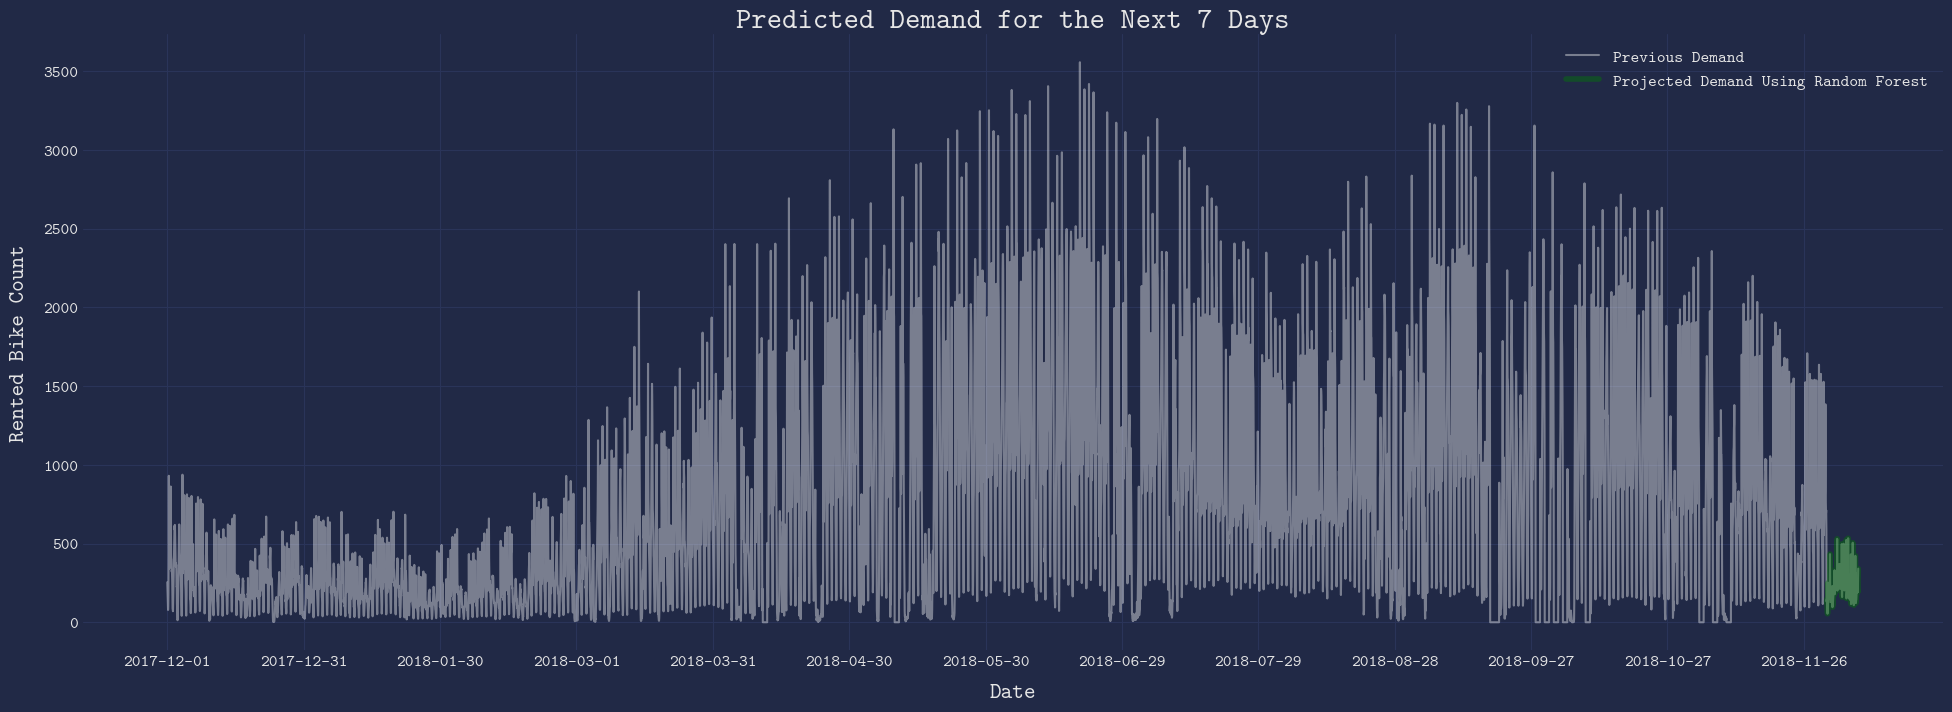

In [27]:
def Plot_Demand(model):
    # Combine historical demand data (Demand) with predicted demand data for the specified model
    full_data = pd.concat([Demand, pd.DataFrame(predicted_data[model]).rename(columns={model: 'Rented Bike Count'})], axis=0)

    # Plot the historical and predicted demand data
    plt.figure(figsize=(24,8))
    plt.plot(full_data, label='Previous Demand', color='white', alpha=0.4)  # Plot actual demand data
    plt.plot(predicted_data[model], label=f'Projected Demand Using {model}', color='green', alpha=0.4, linewidth=4)  # Plot predicted demand data

    # Set labels and title for the plot
    plt.xlabel('Date', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)
    plt.ylabel('Rented Bike Count', fontproperties=font_props, fontsize=16, weight='bold', labelpad=10)
    plt.xticks(pd.date_range(start=Demand.index.min(), end=predicted_data[model].index.max(), freq='30D'), fontproperties=font_props, fontsize=12)
    plt.yticks(fontproperties=font_props, fontsize=12)
    plt.title(f'Predicted Demand for the Next {days_to_predict} Days', fontproperties=font_props, fontsize=21, weight='bold', pad=5)

    # Create a FontProperties object for the legend font
    legend_properties = fm.FontProperties(fname=font_path, size=12)
    # Set legend font using the prop argument and FontProperties object
    plt.legend(prop=legend_properties)

    # Show the plot
    plt.show()

# Usage with our best model, applicable to others as well
Plot_Demand('Random Forest')

<span style="font-family:Times New Roman; font-size:15pt;">
<h5><b>7.2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Results<b></h4>
<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

Upon scrutinizing the outcomes, it is evident that the ARIMA model, proficient in capturing the inherent frequencies and fluctuations within the demand time series, falls short in accurately predicting the magnitude of future demand. The discernible disparity, particularly pronounced in the presence of seasonal behavior, underscores the limitations of relying solely on temporal patterns inherent in ARIMA. However, with the acquisition of feature data, we expanded our predictive capabilities, enabling us to leverage both the Random Forest and Linear Regression models.

The Random Forest model, in particular, demonstrates robust and dependable predictions, showcasing its efficacy in incorporating diverse features. On the other hand, the Linear Regression model, while generally reliable, exhibits occasional inconsistencies by predicting negative demand amounts. This inconsistency highlights a nuance in the Linear Regression results that warrants attention. The evolution from reliance on ARIMA to embracing feature-rich machine learning models represents a significant advancement in our forecasting methodology, offering more accurate and nuanced insights into future demand patterns.

<span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h3><b>8&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Conclusion<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

Our project set out to strategically manage the increasing demand for bicycle rentals at a prominent center in Seoul. Employing a comprehensive dataset, we developed a methodological framework that initially incorporated the Autoregressive Integrated Moving Average (ARIMA) model and later integrated two Machine Learning (ML) models – Linear Regression and Random Forest. The objective was to derive actionable insights for informed decision-making and operational planning through an exploration of rental trends, statistical analyses, and the development of predictive models.

Our examination of bicycle rental trends unearthed nuanced patterns across hours, seasons, and weekdays, providing valuable insights into customer preferences. Statistical analyses, including the Kruskal-Wallis test and Lasso regression, revealed significant variations in rental distribution and emphasized the importance of all variables in predicting rental counts. To mitigate overfitting, our comprehensive strategy encompassed cross-validation, hyperparameter tuning, feature selection, and the incorporation of an ensemble method. Notably, the Random Forest model emerged as the most accurate in predicting demand, showcasing superior performance with the lowest Mean Squared Error (MSE) and the highest R-squared.

As we transition to the 7-day forecast, the newfound inclusion of feature data has significantly influenced our approach. While the Random Forest model continues to demonstrate effectiveness, its reliance on feature data introduces challenges when such information is unavailable for the upcoming period. Conversely, the ARIMA model, adept at predicting without the need for additional features, exhibits limitations in forecasting the magnitude of future demand, especially in the presence of pronounced seasonal behavior. This underscores the delicate balance between relying solely on temporal patterns and incorporating relevant features for optimal prediction.

In essence, our project not only addressed the immediate challenge of demand forecasting but also shed light on the strengths and limitations of different models. The Random Forest model emerged as the superior performer for predicting bicycle rental demand, albeit with data limitations. Looking ahead, a balanced approach that harmonizes both temporal patterns and relevant features will be essential for enhancing the reliability and adaptability of our predictive models in the dynamic landscape of bicycle rentals.

<span>

